In [1]:
import pandas as pd, numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
from WindPy import w

w.start() # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒  
w.isconnected() # 判断WindPy是否已经登录成功

ModuleNotFoundError: No module named 'WindPy'

https://bbs.pinggu.org/forum.php?mod=viewthread&tid=4191608

In [3]:
pip install WindPy

ERROR: Could not find a version that satisfies the requirement WindPy (from versions: none)
ERROR: No matching distribution found for WindPy
Note: you may need to restart the kernel to use updated packages.


# General Examples （不要执行）

https://www.cnblogs.com/dion-90/articles/9034000.html

In [ ]:
from WindPy import w  
  
#from datetime import *  
w.start();  
# 命令如何写可以用命令生成器来辅助完成  
# 定义打印输出函数，用来展示数据使用  
def printpy(outdata):  
    if outdata.ErrorCode!=0:  
        print('error code:'+str(outdata.ErrorCode)+'\n');  
        return();  
    for i in range(0,len(outdata.Data[0])):  
        strTemp=''  
        if len(outdata.Times)>1:  
            strTemp=str(outdata.Times[i])+' '  
        for k in range(0, len(outdata.Fields)):  
            strTemp=strTemp+str(outdata.Data[k][i])+' '  
        print(strTemp)  

        
# 通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据
print('\n\n'+'-----通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据-----'+'\n')  
wsddata1=w.wsd("000001.SZ", "open,high,low,close,volume,amt", "2015-11-22", "2015-12-22", "Fill=Previous")  
printpy(wsddata1)  
  
# 通过wsd来提取各个报告期财务数据  
print('\n\n'+'-----通过wsd来提取各个报告期财务数据-----'+'\n')  
wsddata2=w.wsd("600000.SH", "tot_oper_rev,tot_oper_cost,opprofit,net_profit_is", "2008-01-01", "2015-12-22", "rptType=1;Period=Q;Days=Alldays;Fill=Previous")  
printpy(wsddata2)  
  
# 通过wss来取截面数据  
print('\n\n'+'-----通过wss来取截面数据-----'+'\n')  
wssdata=w.wss("600000.SH,600007.SH,600016.SH", "ev,total_shares","tradeDate=20151222;industryType=1")  
printpy(wssdata)  
  
# 通过wst来取日内成交数据  
print('\n\n'+'-----通过wst来取日内成交数据-----'+'\n')  
wstdata=w.wst("IF.CFE", "last,volume", "2015-12-22 09:00:00", "2015-12-22 14:04:45")  
printpy(wstdata)  
  
# 通过wsi来取日内分钟数据  
print('\n\n'+'-----通过wsi来取日内分钟数据-----'+'\n')  
wsidata=w.wsi("IF.CFE", "open,high,low,close,volume,amt", "2015-12-22 09:00:00", "2015-12-22 14:06:15")  
printpy(wsidata)  
  
# 通过wset来取数据集数据  
print('\n\n'+'-----通过wset来取数据集数据,获取沪深300指数权重-----'+'\n')  
wsetdata=w.wset("IndexConstituent","date=20151222;windcode=000300.SH;field=date,wind_code,i_weight")  
printpy(wsetdata)  

In [103]:
w.wsi("600000.SH", "close", "2020-11-25 09:00:00", "2020-11-25 13:10:58", "", usedf=True)[1]

,close
2020-11-25 09:30:00,9.95
2020-11-25 09:31:00,9.94
2020-11-25 09:32:00,9.94
2020-11-25 09:33:00,9.92
2020-11-25 09:34:00,9.93
...,...
2020-11-25 13:06:00,9.88
2020-11-25 13:07:00,9.89
2020-11-25 13:08:00,9.87
2020-11-25 13:09:00,9.88


In [105]:
def printpy(outdata):  
    if outdata.ErrorCode!=0:  
        print('error code:'+str(outdata.ErrorCode)+'\n');  
        return();  
    for i in range(0,len(outdata.Data[0])):  
        strTemp=''  
        if len(outdata.Times)>1:  
            strTemp=str(outdata.Times[i])+' '  
        for k in range(0, len(outdata.Fields)):  
            strTemp=strTemp+str(outdata.Data[k][i])+' '  
        print(strTemp)  

wsddata2=w.wsd("AE.A", "tot_oper_rev,tot_oper_cost,opprofit,net_profit_is", "2008-01-01", "2015-12-22", "rptType=1;Period=Q;Days=Alldays;Fill=Previous", usedf=True)  

In [107]:
wsddata2[1]

,TOT_OPER_REV,TOT_OPER_COST,OPPROFIT,NET_PROFIT_IS
2008-03-31,NaN,NaN,NaN,NaN
2008-06-30,NaN,NaN,NaN,NaN
2008-09-30,NaN,NaN,NaN,NaN
2008-12-31,4.159672e+09,4.171333e+09,NaN,-5572000.0
2009-03-31,4.159672e+09,4.171333e+09,NaN,-5572000.0
2009-06-30,4.159672e+09,4.171333e+09,NaN,-5572000.0
2009-09-30,4.159672e+09,4.171333e+09,NaN,-5572000.0
2009-12-31,1.943128e+09,1.936752e+09,NaN,4149000.0
2010-03-31,1.943128e+09,1.936752e+09,NaN,4149000.0
2010-06-30,1.943128e+09,1.936752e+09,NaN,4149000.0


# 获取日时间序列数据WSD

In [2]:
df = w.wsd(codes = "000592.SZ", fields = ["CLOSE,HIGH,LOW,OPEN"], beginTime = "2016-01-01", endTime = "2017-01-01")

In [3]:
history_data=w.wsd("010107.SH",
                   "sec_name,ytm_b,volume,duration,convexity,open,high,low,close,vwap", 
                   "2018-06-01", "2018-06-11", "returnType=1;PriceAdj=CP", usedf=True) 

In [11]:
his_df = history_data[1]

<AxesSubplot:>

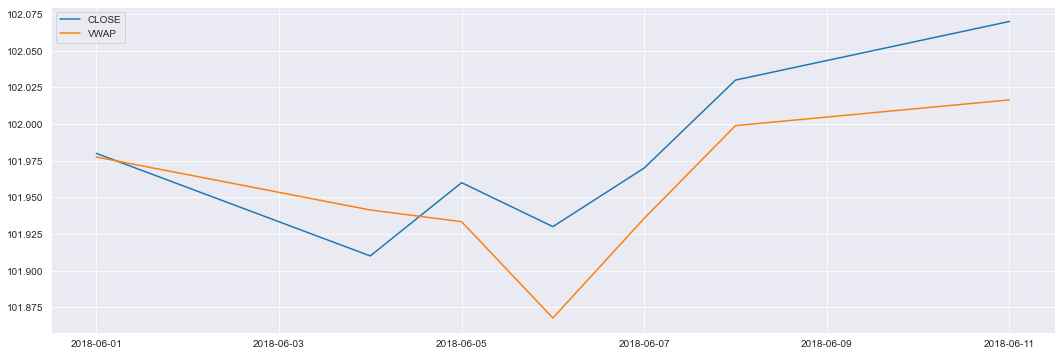

In [56]:
his_df[['CLOSE','VWAP']].plot(figsize = (18,6))

# （Main）美股基本面数据

## 单只股票

In [17]:
goog_ps_ttm = w.wsd("GOOG.O", "ps_ttm", "2019-10-28", "2020-11-27", "TradingCalendar=NYSE;Currency=USD")

In [25]:
goog_ps_ttm

.ErrorCode=0
.Codes=[GOOG.O]
.Fields=[PS_TTM]
.Times=[20191028,20191029,20191030,20191031,20191101,20191104,20191105,20191106,20191107,20191108,...]
.Data=[[5.768705074875208,5.616047974667544,5.610132225031923,5.604883665202698,5.665508979149738,5.743926021327503,5.7468616564833805,5.745838632111854,5.821720353016291,5.832884662481137,...]]

In [42]:
goog_ps_ttm_df = pd.DataFrame()
goog_ps_ttm_df['PS_TTM'] = goog_ps_ttm.Data[0]
goog_ps_ttm_df['Codes'] = goog_ps_ttm.Codes[0]
goog_ps_ttm_df['Fields'] = goog_ps_ttm.Fields[0]
goog_ps_ttm_df['Times'] = pd.to_datetime(goog_ps_ttm.Times)
goog_ps_ttm_df.index = goog_ps_ttm_df['Times']

<AxesSubplot:xlabel='Times'>

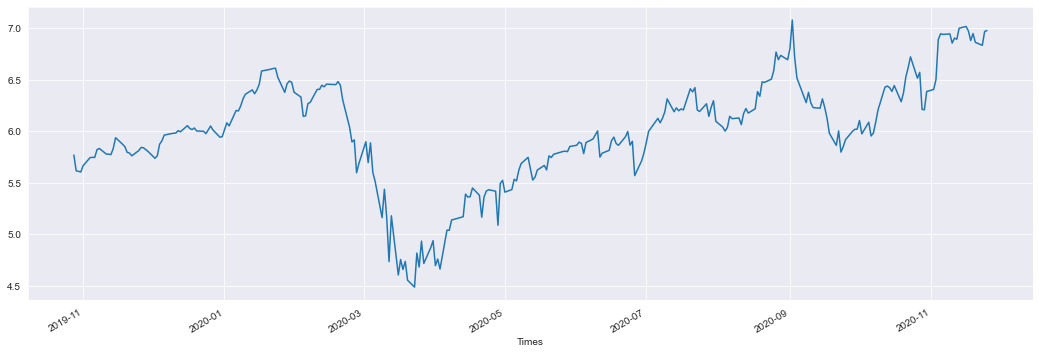

In [55]:
goog_ps_ttm_df['PS_TTM'].plot(figsize = (18,6))

## 多只股票

In [67]:
stocks_ps_ttm = w.wsd(["GOOG.O", "AAPL.O"], "ps_ttm", "2019-10-28", "2020-11-27")

In [68]:
stocks_ps_ttm

.ErrorCode=0
.Codes=[GOOG.O,AAPL.O]
.Fields=[PS_TTM]
.Times=[20191028,20191029,20191030,20191031,20191101,20191104,20191105,20191106,20191107,20191108,...]
.Data=[[5.768705074875208,5.616047974667544,5.610132225031923,5.604883665202698,5.665508979149738,5.743926021327503,5.7468616564833805,5.745838632111854,5.821720353016291,5.832884662481137,...],[4.344996328667279,4.244505749052248,4.225386575138177,4.248336118905041,4.368907163283033,4.397598289990545,4.3912794108942474,4.393157996571525,4.430558929600959,4.442684346245205,...]]

## 所有纽交所股票

In [3]:
nyse_ps_tts = w.wsd("A.N,AA.N,AAIC.N,AAN.N,AAP.N,AAT.N,AB.N,ABB.N,ABBV.N,ABC.N,ABEV.N,ABG.N,ABM.N,ABR.N,ABT.N,AC.N,ACA.N,ACB.N,ACC.N,ACCO.N,ACEL.N,ACH.N,ACI.N,ACIC_U.N,ACM.N,ACN.N,ACND.N,ACND_U.N,ACRE.N,ADC.N,ADCT.N,ADM.N,ADNT.N,ADS.N,ADT.N,AEE.N,AEG.N,AEL.N,AEM.N,AENZ.N,AEO.N,AER.N,AES.N,AFG.N,AFI.N,AFL.N,AG.N,AGCO.N,AGI.N,AGM.N,AGM_A.N,AGO.N,AGR.N,AGRO.N,AGS.N,AGX.N,AHC.N,AHH.N,AHT.N,AIG.N,AIN.N,AIR.N,AIT.N,AIV.N,AIZ.N,AJAX_U.N,AJG.N,AJRD.N,AJX.N,AKO_A.N,AKO_B.N,AKR.N,AL.N,ALB.N,ALC.N,ALE.N,ALEX.N,ALG.N,ALK.N,ALL.N,ALLE.N,ALLY.N,ALSN.N,ALTG.N,ALUS.N,ALUS_U.N,ALV.N,ALX.N,AM.N,AMBC.N,AMC.N,AMCR.N,AME.N,AMG.N,AMH.N,AMK.N,AMN.N,AMOV.N,AMP.N,AMPY.N,AMRC.N,AMRX.N,AMT.N,AMWL.N,AMX.N,AN.N,ANET.N,ANF.N,ANH.N,ANTM.N,AON.N,AONE.N,AONE_U.N,AOS.N,AP.N,APAM.N,APD.N,APG.N,APH.N,APLE.N,APO.N,APRN.N,APSG.N,APSG_U.N,APTS.N,APTV.N,AQN.N,AQUA.N,AR.N,ARA.N,ARC.N,ARCH.N,ARCO.N,ARD.N,ARE.N,ARES.N,ARGO.N,ARI.N,ARL.N,ARLO.N,ARMK.N,ARNC.N,AROC.N,ARR.N,ARW.N,ASAN.N,ASAQ.N,ASAQ_U.N,ASB.N,ASC.N,ASGN.N,ASH.N,ASIX.N,ASPL.N,ASPL_U.N,ASPN.N,ASR.N,ASX.N,AT.N,ATACU.N,ATCO.N,ATEN.N,ATGE.N,ATH.N,ATHM.N,ATI.N,ATKR.N,ATO.N,ATR.N,ATTO.N,ATUS.N,ATV.N,AU.N,AUY.N,AVA.N,AVAL.N,AVAN.N,AVAN_U.N,AVB.N,AVD.N,AVLR.N,AVNS.N,AVNT.N,AVTR.N,AVY.N,AVYA.N,AWI.N,AWK.N,AWR.N,AX.N,AXL.N,AXP.N,AXR.N,AXS.N,AXTA.N,AYI.N,AYX.N,AZEK.N,AZO.N,AZRE.N,AZUL.N,AZZ.N,B.N,BA.N,BABA.N,BAC.N,BAH.N,BAK.N,BALY.N,BAM.N,BANC.N,BAP.N,BAX.N,BB.N,BBAR.N,BBD.N,BBDC.N,BBDO.N,BBL.N,BBU.N,BBVA.N,BBW.N,BBY.N,BC.N,BCC.N,BCE.N,BCEI.N,BCH.N,BCO.N,BCS.N,BCSF.N,BDC.N,BDN.N,BDX.N,BE.N,BEDU.N,BEKE.N,BEN.N,BEP.N,BEPC.N,BERY.N,BEST.N,BF_A.N,BF_B.N,BFAM.N,BFS.N,BFT.N,BFT_U.N,BG.N,BGS.N,BGSF.N,BH.N,BH_A.N,BHC.N,BHE.N,BHLB.N,BHP.N,BHR.N,BHVN.N,BIG.N,BILL.N,BIO.N,BIO_B.N,BIP.N,BIPC.N,BJ.N,BK.N,BKD.N,BKE.N,BKH.N,BKI.N,BKR.N,BKU.N,BLD.N,BLK.N,BLL.N,BLX.N,BMA.N,BMI.N,BMO.N,BMY.N,BNED.N,BNL.N,BNS.N,BOAC_U.N,BOH.N,BOOT.N,BORR.N,BOX.N,BP.N,BPMP.N,BPT.N,BQ.N,BR.N,BRBR.N,BRC.N,BRFS.N,BRK_A.N,BRK_B.N,BRMK.N,BRO.N,BRT.N,BRX.N,BSAC.N,BSBR.N,BSIG.N,BSM.N,BSMX.N,BSN.N,BSN_U.N,BSX.N,BTE.N,BTI.N,BTU.N,BUD.N,BUR.N,BURL.N,BV.N,BVH.N,BVN.N,BW.N,BWA.N,BWXT.N,BX.N,BXC.N,BXG.N,BXMT.N,BXP.N,BXS.N,BY.N,BYD.N,BZH.N,C.N,CAAP.N,CABO.N,CACI.N,CADE.N,CAE.N,CAG.N,CAH.N,CAI.N,CAJ.N,CAL.N,CALX.N,CANG.N,CAPL.N,CARR.N,CARS.N,CAS_U.N,CAT.N,CATO.N,CB.N,CBB.N,CBD.N,CBRE.N,CBT.N,CBU.N,CBZ.N,CC.N,CCAC.N,CCAC_U.N,CCC.N,CCEP.N,CCI.N,CCIV.N,CCIV_U.N,CCJ.N,CCK.N,CCL.N,CCM.N,CCO.N,CCR.N,CCS.N,CCU.N,CCX.N,CCX_U.N,CDAY.N,CDE.N,CDR.N,CE.N,CEA.N,CEIX.N,CEL.N,CELP.N,CEO.N,CEPU.N,CEQP.N,CF.N,CFG.N,CFR.N,CFX.N,CGA.N,CHA.N,CHCT.N,CHD.N,CHE.N,CHGG.N,CHH.N,CHL.N,CHMI.N,CHRA.N,CHS.N,CHT.N,CHU.N,CHWY.N,CHX.N,CI.N,CIA.N,CIB.N,CIEN.N,CIG.N,CIG_C.N,CIM.N,CINR.N,CIO.N,CIR.N,CIT.N,CIXX.N,CKH.N,CL.N,CLA.N,CLA_U.N,CLB.N,CLDR.N,CLDT.N,CLF.N,CLGX.N,CLH.N,CLI.N,CLII.N,CLII_U.N,CLNC.N,CLNY.N,CLPR.N,CLR.N,CLS.N,CLW.N,CLX.N,CM.N,CMA.N,CMC.N,CMCM.N,CMD.N,CMG.N,CMI.N,CMO.N,CMP.N,CMRE.N,CMS.N,CNA.N,CNC.N,CNF.N,CNHI.N,CNI.N,CNK.N,CNMD.N,CNNE.N,CNO.N,CNP.N,CNQ.N,CNR.N,CNS.N,CNX.N,CO.N,CODI.N,COE.N,COF.N,COG.N,COLD.N,COO.N,COP.N,COR.N,CORR.N,COTY.N,CP.N,CPA.N,CPAC.N,CPB.N,CPE.N,CPF.N,CPG.N,CPK.N,CPLG.N,CPRI.N,CPS.N,CPSR.N,CPSR_U.N,CPT.N,CR.N,CRC.N,CRD_A.N,CRD_B.N,CRH.N,CRHC.N,CRHC_U.N,CRI.N,CRK.N,CRL.N,CRM.N,CRS.N,CRT.N,CRY.N,CS.N,CSL.N,CSLT.N,CSPR.N,CSTM.N,CSU.N,CSV.N,CTAC_U.N,CTB.N,CTK.N,CTLT.N,CTRA.N,CTS.N,CTT.N,CTVA.N,CUB.N,CUBE.N,CUBI.N,CUK.N,CULP.N,CURO.N,CUZ.N,CVA.N,CVE.N,CVEO.N,CVI.N,CVNA.N,CVS.N,CVX.N,CW.N,CWEN.N,CWEN_A.N,CWH.N,CWK.N,CWT.N,CX.N,CXO.N,CXP.N,CXW.N,CYD.N,CYH.N,CZZ.N,D.N,DAC.N,DAL.N,DAN.N,DAO.N,DAR.N,DAVA.N,DB.N,DBD.N,DBI.N,DCI.N,DCO.N,DCP.N,DD.N,DDD.N,DDS.N,DE.N,DEA.N,DECK.N,DEH.N,DEH_U.N,DEI.N,DELL.N,DEN.N,DEO.N,DESP.N,DFIN.N,DFNS.N,DFNS_U.N,DFS.N,DG.N,DGNR.N,DGNR_U.N,DGX.N,DHI.N,DHR.N,DHT.N,DHX.N,DIN.N,DIS.N,DK.N,DKL.N,DKS.N,DL.N,DLB.N,DLNG.N,DLR.N,DLX.N,DMS.N,DMYD.N,DMYD_U.N,DMYI_U.N,DMYT.N,DMYT_U.N,DNB.N,DNK.N,DNOW.N,DOC.N,DOOR.N,DOV.N,DOW.N,DPZ.N,DQ.N,DRD.N,DRE.N,DRH.N,DRI.N,DRQ.N,DS.N,DSSI.N,DSX.N,DT.N,DTE.N,DUK.N,DVA.N,DVD.N,DVN.N,DX.N,DXC.N,DY.N,E.N,EAF.N,EARN.N,EAT.N,EB.N,EBF.N,EBR.N,EBR_B.N,EBS.N,EC.N,ECC.N,ECL.N,ECOM.N,ED.N,EDN.N,EDU.N,EEX.N,EFC.N,EFX.N,EGHT.N,EGO.N,EGP.N,EGY.N,EHC.N,EIC.N,EIG.N,EIX.N,EL.N,ELAN.N,ELF.N,ELP.N,ELS.N,ELVT.N,ELY.N,EME.N,EMN.N,EMPW_U.N,EMR.N,ENB.N,ENBL.N,ENIA.N,ENIC.N,ENLC.N,ENPC.N,ENPC_U.N,ENR.N,ENS.N,ENV.N,ENVA.N,ENZ.N,EOG.N,EPAC.N,EPAM.N,EPC.N,EPD.N,EPR.N,EPRT.N,EQC.N,EQD.N,EQD_U.N,EQH.N,EQNR.N,EQR.N,EQS.N,EQT.N,ERF.N,ERJ.N,ES.N,ESE.N,ESGC.N,ESI.N,ESNT.N,ESRT.N,ESS.N,ESTC.N,ESTE.N,ET.N,ETH.N,ETM.N,ETN.N,ETR.N,ETRN.N,EURN.N,EV.N,EVA.N,EVC.N,EVH.N,EVR.N,EVRG.N,EVRI.N,EVTC.N,EW.N,EXK.N,EXP.N,EXPR.N,EXR.N,EXTN.N,F.N,FAF.N,FAII.N,FAII_U.N,FBC.N,FBHS.N,FBK.N,FBM.N,FBP.N,FC.N,FCAU.N,FCF.N,FCN.N,FCPT.N,FCX.N,FDP.N,FDS.N,FDX.N,FE.N,FEAC.N,FEAC_U.N,FEDU.N,FENG.N,FET.N,FF.N,FFG.N,FGNA.N,FGNA_U.N,FHI.N,FHN.N,FI.N,FICO.N,FINV.N,FIS.N,FIT.N,FIX.N,FL.N,FLNG.N,FLO.N,FLOW.N,FLR.N,FLS.N,FLT.N,FLY.N,FMAC_U.N,FMC.N,FMS.N,FMX.N,FN.N,FNB.N,FND.N,FNF.N,FNV.N,FOE.N,FOR.N,FOUR.N,FPH.N,FPI.N,FR.N,FRC.N,FRO.N,FRT.N,FRX_U.N,FSK.N,FSKR.N,FSLY.N,FSM.N,FSR.N,FSS.N,FST.N,FST_U.N,FTAI.N,FTCH.N,FTI.N,FTK.N,FTS.N,FTV.N,FUBO.N,FUL.N,FUN.N,FUSE.N,FUSE_U.N,FVRR.N,G.N,GATO.N,GATX.N,GB.N,GBL.N,GBX.N,GCI.N,GCO.N,GCP.N,GD.N,GDDY.N,GDOT.N,GE.N,GEF.N,GEF_B.N,GEL.N,GEN.N,GEO.N,GES.N,GFF.N,GFI.N,GFL.N,GGB.N,GGG.N,GHC.N,GHG.N,GHL.N,GHLD.N,GHM.N,GIB.N,GIK.N,GIK_U.N,GIL.N,GIS.N,GIX.N,GIX_U.N,GKOS.N,GL.N,GLEO.N,GLEO_U.N,GLOB.N,GLOG.N,GLOP.N,GLP.N,GLT.N,GLW.N,GM.N,GME.N,GMED.N,GMRE.N,GMS.N,GNE.N,GNK.N,GNL.N,GNPK_U.N,GNRC.N,GNW.N,GOAC.N,GOAC_U.N,GOL.N,GOLD.N,GOLF.N,GOOS.N,GPC.N,GPI.N,GPK.N,GPMT.N,GPN.N,GPRK.N,GPS.N,GPX.N,GRA.N,GRC.N,GRP_U.N,GRUB.N,GS.N,GSAH.N,GSAH_U.N,GSBD.N,GSH.N,GSK.N,GSL.N,GSX.N,GTES.N,GTN.N,GTN_A.N,GTS.N,GTT.N,GTY.N,GVA.N,GWB.N,GWRE.N,GWW.N,H.N,HAE.N,HAL.N,HASI.N,HBB.N,HBI.N,HBM.N,HCA.N,HCC.N,HCFT.N,HCHC.N,HCI.N,HD.N,HDB.N,HE.N,HEI.N,HEI_A.N,HEP.N,HES.N,HESM.N,HEXO.N,HFC.N,HGV.N,HHC.N,HI.N,HIG.N,HIGA_U.N,HII.N,HIL.N,HIW.N,HKIB.N,HL.N,HLF.N,HLI.N,HLT.N,HLX.N,HMC.N,HMI.N,HMLP.N,HMN.N,HMY.N,HNGR.N,HNI.N,HNP.N,HOG.N,HOME.N,HON.N,HOV.N,HP.N,HPE.N,HPP.N,HPQ.N,HPR.N,HPX.N,HPX_U.N,HR.N,HRB.N,HRC.N,HRI.N,HRL.N,HRTG.N,HSBC.N,HSC.N,HSY.N,HT.N,HTA.N,HTGC.N,HTH.N,HUBB.N,HUBS.N,HUD.N,HUM.N,HUN.N,HUYA.N,HVT.N,HVT_A.N,HWM.N,HXL.N,HY.N,HYLN.N,HZAC.N,HZAC_U.N,HZN.N,HZO.N,HZON_U.N,IAA.N,IACA.N,IACA_U.N,IAG.N,IBA.N,IBM.N,IBN.N,IBP.N,ICD.N,ICE.N,ICL.N,IDA.N,IDT.N,IEX.N,IFF.N,IFS.N,IGT.N,IH.N,IHC.N,IHG.N,IIAC_U.N,IIPR.N,IMAX.N,IMPX.N,IMPX_U.N,INFO.N,INFY.N,ING.N,INGR.N,INN.N,INSP.N,INSW.N,INT.N,INVH.N,IO.N,IP.N,IPG.N,IPI.N,IPOB.N,IPOB_U.N,IPOC.N,IPOC_U.N,IPOD_U.N,IPOE_U.N,IPOF_U.N,IPV.N,IPV_U.N,IQV.N,IR.N,IRET.N,IRM.N,IRS.N,IRT.N,IT.N,ITCB.N,ITGR.N,ITT.N,ITUB.N,ITW.N,IVC.N,IVR.N,IVZ.N,IX.N,J.N,JAX.N,JBGS.N,JBL.N,JBT.N,JCI.N,JE.N,JEF.N,JELD.N,JHG.N,JHX.N,JIH.N,JIH_U.N,JILL.N,JKS.N,JLL.N,JMIA.N,JMP.N,JNJ.N,JNPR.N,JOE.N,JP.N,JPM.N,JT.N,JW_A.N,JW_B.N,JWN.N,JWS.N,JWS_U.N,K.N,KAI.N,KAMN.N,KAR.N,KB.N,KBH.N,KBR.N,KCAC.N,KCAC_U.N,KEN.N,KEP.N,KEX.N,KEY.N,KEYS.N,KFS.N,KFY.N,KGC.N,KIM.N,KKR.N,KL.N,KMB.N,KMI.N,KMPR.N,KMT.N,KMX.N,KN.N,KNL.N,KNOP.N,KNX.N,KO.N,KODK.N,KOF.N,KOP.N,KOS.N,KR.N,KRA.N,KRC.N,KREF.N,KRG.N,KRO.N,KRP.N,KSS.N,KSU.N,KT.N,KTB.N,KW.N,KWAC_U.N,KWR.N,L.N,LAC.N,LAD.N,LADR.N,LAIX.N,LAZ.N,LB.N,LBRT.N,LC.N,LCI.N,LCII.N,LDL.N,LDOS.N,LEA.N,LEAF.N,LEAP.N,LEAP_U.N,LEE.N,LEG.N,LEJU.N,LEN.N,LEN_B.N,LEVI.N,LFC.N,LGF_A.N,LGF_B.N,LGVW.N,LGVW_U.N,LH.N,LHX.N,LII.N,LIN.N,LINX.N,LITB.N,LL.N,LLY.N,LMND.N,LMT.N,LN.N,LNC.N,LND.N,LNFA_U.N,LNN.N,LOAK.N,LOAK_U.N,LOMA.N,LOW.N,LPG.N,LPI.N,LPL.N,LPX.N,LRN.N,LSF.N,LSI.N,LSPD.N,LTC.N,LTHM.N,LU.N,LUB.N,LUMN.N,LUV.N,LVS.N,LW.N,LXFR.N,LXP.N,LXU.N,LYB.N,LYG.N,LYV.N,LZB.N,M.N,MA.N,MAA.N,MAC.N,MAIN.N,MAN.N,MANU.N,MAS.N,MATX.N,MAX.N,MAXR.N,MBI.N,MBT.N,MC.N,MCB.N,MCC.N,MCD.N,MCK.N,MCO.N,MCS.N,MCY.N,MD.N,MDC.N,MDLA.N,MDLY.N,MDP.N,MDT.N,MDU.N,MEC.N,MED.N,MEG.N,MEI.N,MET.N,MFA.N,MFAC.N,MFAC_U.N,MFC.N,MFG.N,MFGP.N,MG.N,MGA.N,MGM.N,MGP.N,MGY.N,MHK.N,MHO.N,MIC.N,MITT.N,MIXT.N,MKC.N,MKC_V.N,MKL.N,MLI.N,MLM.N,MLP.N,MLR.N,MMC.N,MMI.N,MMM.N,MMP.N,MMS.N,MN.N,MNR.N,MNRL.N,MNSO.N,MO.N,MOD.N,MODN.N,MOG_A.N,MOG_B.N,MOGU.N,MOH.N,MOS.N,MOV.N,MP.N,MPC.N,MPLN.N,MPLX.N,MPW.N,MPX.N,MRC.N,MRK.N,MRO.N,MS.N,MSA.N,MSB.N,MSC.N,MSCI.N,MSGE.N,MSGN.N,MSGS.N,MSI.N,MSM.N,MSP.N,MT.N,MTB.N,MTD.N,MTDR.N,MTG.N,MTH.N,MTL.N,MTN.N,MTOR.N,MTR.N,MTRN.N,MTW.N,MTX.N,MTZ.N,MUFG.N,MUR.N,MUSA.N,MUX.N,MVC.N,MVO.N,MWA.N,MX.N,MXL.N,MYE.N,MYOV.N,NAT.N,NAV.N,NBHC.N,NBR.N,NC.N,NCLH.N,NCR.N,NEE.N,NEM.N,NEP.N,NET.N,NEU.N,NEW.N,NEWR.N,NEX.N,NEXA.N,NFG.N,NFH.N,NGA.N,NGA_U.N,NGG.N,NGS.N,NGVC.N,NGVT.N,NHI.N,NI.N,NINE.N,NIO.N,NJR.N,NKE.N,NL.N,NLS.N,NLSN.N,NLY.N,NM.N,NMM.N,NMR.N,NNA.N,NNI.N,NNN.N,NOA.N,NOAH.N,NOC.N,NOK.N,NOMD.N,NOV.N,NOVA.N,NOW.N,NP.N,NPK.N,NPO.N,NPTN.N,NR.N,NREF.N,NRG.N,NRP.N,NRT.N,NRZ.N,NS.N,NSA.N,NSC.N,NSCO.N,NSH.N,NSH_U.N,NSP.N,NTB.N,NTCO.N,NTP.N,NTR.N,NTST.N,NTZ.N,NUE.N,NUS.N,NVGS.N,NVO.N,NVR.N,NVRO.N,NVS.N,NVST.N,NVT.N,NVTA.N,NWG.N,NWHM.N,NWN.N,NX.N,NXRT.N,NYC.N,NYCB.N,NYT.N,O.N,OAC.N,OAC_U.N,OACB.N,OACB_U.N,OC.N,OCA_U.N,OCFT.N,OCN.N,ODC.N,OEC.N,OFC.N,OFG.N,OGE.N,OGS.N,OHI.N,OI.N,OIBR_C.N,OII.N,OIS.N,OKE.N,OLN.N,OLP.N,OMC.N,OMF.N,OMI.N,ONE.N,ONTO.N,OOMA.N,OPY.N,OR.N,ORA.N,ORAN.N,ORC.N,ORCC.N,ORCL.N,ORI.N,ORN.N,OSB.N,OSG.N,OSH.N,OSK.N,OTIS.N,OUT.N,OVV.N,OXM.N,OXY.N,PAA.N,PAC.N,PACE_U.N,PACK.N,PAG.N,PAGP.N,PAGS.N,PAM.N,PANA.N,PANA_U.N,PANW.N,PAR.N,PARR.N,PAYC.N,PB.N,PBA.N,PBF.N,PBFX.N,PBH.N,PBI.N,PBR.N,PBR_A.N,PBT.N,PCG.N,PCPL.N,PCPL_U.N,PD.N,PDAC.N,PDAC_U.N,PDM.N,PDS.N,PE.N,PEAK.N,PEB.N,PEG.N,PEI.N,PEN.N,PFE.N,PFGC.N,PFS.N,PFSI.N,PG.N,PGR.N,PGRE.N,PGTI.N,PH.N,PHG.N,PHI.N,PHM.N,PHR.N,PHX.N,PIAI.N,PIAI_U.N,PIC.N,PIC_U.N,PII.N,PINE.N,PING.N,PINS.N,PIPP_U.N,PIPR.N,PJT.N,PK.N,PKE.N,PKG.N,PKI.N,PKX.N,PLAN.N,PLD.N,PLNT.N,PLOW.N,PLT.N,PLTR.N,PLYM.N,PM.N,PMT.N,PMVC.N,PMVC_U.N,PNC.N,PNM.N,PNR.N,PNW.N,POR.N,POST.N,PPG.N,PPL.N,PQG.N,PRA.N,PRGO.N,PRI.N,PRLB.N,PRMW.N,PRO.N,PROS.N,PRPB.N,PRPB_U.N,PRSP.N,PRT.N,PRTY.N,PRU.N,PSA.N,PSB.N,PSN.N,PSO.N,PSTG.N,PSTH.N,PSTL.N,PSX.N,PSXP.N,PTR.N,PUK.N,PUMP.N,PVG.N,PVH.N,PVL.N,PWR.N,PXD.N,PZN.N,QD.N,QEP.N,QGEN.N,QSR.N,QTS.N,QTWO.N,QUAD.N,QUOT.N,R.N,RACE.N,RAD.N,RAMP.N,RBA.N,RBAC.N,RBAC_U.N,RBC.N,RC.N,RCI.N,RCL.N,RCUS.N,RDN.N,RDS_A.N,RDS_B.N,RDY.N,RE.N,RELX.N,RENN.N,RES.N,RESI.N,REV.N,REVG.N,REX.N,REXR.N,REZI.N,RF.N,RFL.N,RFP.N,RGA.N,RGR.N,RGS.N,RH.N,RHI.N,RHP.N,RICE_U.N,RIG.N,RIO.N,RJF.N,RKT.N,RL.N,RLGY.N,RLH.N,RLI.N,RLJ.N,RM.N,RMAX.N,RMD.N,RMED.N,RMG.N,RMG_U.N,RNG.N,RNGR.N,RNR.N,ROG.N,ROK.N,ROL.N,ROP.N,RPAI.N,RPLA.N,RPLA_U.N,RPM.N,RPT.N,RRC.N,RRD.N,RS.N,RSF.N,RSG.N,RTP.N,RTP_U.N,RTPZ_U.N,RTX.N,RVI.N,RVLV.N,RWT.N,RXN.N,RY.N,RYAM.N,RYB.N,RYI.N,RYN.N,SA.N,SAFE.N,SAH.N,SAIC.N,SAIL.N,SALT.N,SAM.N,SAN.N,SAND.N,SAP.N,SAR.N,SAVE.N,SB.N,SBE.N,SBE_U.N,SBG.N,SBG_U.N,SBH.N,SBOW.N,SBR.N,SBS.N,SBSW.N,SC.N,SCCO.N,SCHW.N,SCI.N,SCL.N,SCM.N,SCPE.N,SCPE_U.N,SCS.N,SCU.N,SCVX.N,SCVX_U.N,SCX.N,SD.N,SE.N,SEAH.N,SEAH_U.N,SEAS.N,SEE.N,SEM.N,SF.N,SFE.N,SFL.N,SFTW.N,SFTW_U.N,SFUN.N,SGU.N,SHAK.N,SHG.N,SHI.N,SHLX.N,SHO.N,SHOP.N,SHW.N,SI.N,SID.N,SIG.N,SII.N,SITC.N,SITE.N,SIX.N,SJI.N,SJM.N,SJR.N,SJT.N,SJW.N,SKM.N,SKT.N,SKX.N,SKY.N,SLB.N,SLCA.N,SLF.N,SLG.N,SLQT.N,SM.N,SMAR.N,SMFG.N,SMG.N,SMHI.N,SMLP.N,SMP.N,SNA.N,SNAP.N,SNDR.N,SNE.N,SNN.N,SNOW.N,SNP.N,SNPR.N,SNPR_U.N,SNR.N,SNV.N,SNX.N,SO.N,SOAC.N,SOAC_U.N,SOGO.N,SOI.N,SOL.N,SON.N,SOS.N,SPB.N,SPCE.N,SPG.N,SPGI.N,SPH.N,SPLP.N,SPNV_U.N,SPOT.N,SPR.N,SPXC.N,SQ.N,SQM.N,SQNS.N,SQZ.N,SR.N,SRC.N,SRE.N,SRG.N,SRI.N,SRL.N,SRLP.N,SRT.N,SSD.N,SSL.N,SSTK.N,ST.N,STAG.N,STAR.N,STC.N,STE.N,STG.N,STIC_U.N,STL.N,STM.N,STN.N,STNG.N,STON.N,STOR.N,STPK.N,STPK_U.N,STT.N,STWD.N,STZ.N,STZ_B.N,SU.N,SUI.N,SUM.N,SUN.N,SUP.N,SUPV.N,SUZ.N,SWCH.N,SWI.N,SWK.N,SWM.N,SWN.N,SWX.N,SXC.N,SXI.N,SXT.N,SYF.N,SYK.N,SYX.N,SYY.N,T.N,TAC.N,TAK.N,TAL.N,TALO.N,TAP.N,TAP_A.N,TARO.N,TBI.N,TCI.N,TCO.N,TCP.N,TCS.N,TD.N,TDC.N,TDG.N,TDOC.N,TDS.N,TDW.N,TDY.N,TECK.N,TEF.N,TEL.N,TEN.N,TEO.N,TEVA.N,TEX.N,TFC.N,TFII.N,TFX.N,TG.N,TGH.N,TGI.N,TGNA.N,TGP.N,TGS.N,TGT.N,THC.N,THG.N,THO.N,THR.N,THS.N,TIF.N,TIMB.N,TINV_U.N,TISI.N,TJX.N,TK.N,TKC.N,TKR.N,TLK.N,TLYS.N,TM.N,TME.N,TMHC.N,TMO.N,TMST.N,TMX.N,TNC.N,TNET.N,TNK.N,TNP.N,TOL.N,TOT.N,TPB.N,TPC.N,TPGY_U.N,TPH.N,TPL.N,TPR.N,TPRE.N,TPVG.N,TPX.N,TR.N,TRC.N,TREB.N,TREB_U.N,TREC.N,TREX.N,TRGP.N,TRI.N,TRN.N,TRNE.N,TRNE_U.N,TRNO.N,TROX.N,TRP.N,TRQ.N,TRTN.N,TRTX.N,TRU.N,TRV.N,TS.N,TSE.N,TSLX.N,TSM.N,TSN.N,TSQ.N,TT.N,TTC.N,TTI.N,TTM.N,TU.N,TUFN.N,TUP.N,TV.N,TWI.N,TWLO.N,TWND.N,TWND_U.N,TWO.N,TWTR.N,TX.N,TXT.N,TYL.N,U.N,UA.N,UAA.N,UBA.N,UBER.N,UBP.N,UBS.N,UDR.N,UE.N,UFI.N,UFS.N,UGI.N,UGP.N,UHS.N,UHT.N,UI.N,UIS.N,UL.N,UMC.N,UMH.N,UN.N,UNF.N,UNFI.N,UNH.N,UNM.N,UNP.N,UNVR.N,UPS.N,URI.N,USAC.N,USB.N,USDP.N,USFD.N,USM.N,USNA.N,USPH.N,USX.N,UTI.N,UTL.N,UTZ.N,UVE.N,UVV.N,V.N,VAC.N,VALE.N,VAPO.N,VAR.N,VCRA.N,VEC.N,VEDL.N,VEEV.N,VEL.N,VER.N,VERT_U.N,VET.N,VFC.N,VGAC.N,VGAC_U.N,VGR.N,VHC.N,VHI.N,VIAO.N,VICI.N,VIPS.N,VIST.N,VIV.N,VLO.N,VLRS.N,VMC.N,VMI.N,VMW.N,VNCE.N,VNE.N,VNO.N,VNT.N,VNTR.N,VOYA.N,VPG.N,VRS.N,VRT.N,VRTV.N,VSH.N,VST.N,VSTO.N,VTOL.N,VTR.N,VVI.N,VVNT.N,VVV.N,VYGG.N,VYGG_U.N,VZ.N,W.N,WAB.N,WAL.N,WAT.N,WBAI.N,WBK.N,WBS.N,WBT.N,WCC.N,WCN.N,WD.N,WDR.N,WEC.N,WEI.N,WELL.N,WES.N,WEX.N,WF.N,WFC.N,WGO.N,WH.N,WHD.N,WHG.N,WHR.N,WIT.N,WK.N,WLK.N,WLKP.N,WLL.N,WM.N,WMB.N,WMC.N,WMK.N,WMS.N,WMT.N,WNC.N,WNS.N,WOR.N,WORK.N,WOW.N,WPC.N,WPF.N,WPF_U.N,WPG.N,WPM.N,WPP.N,WPX.N,WRB.N,WRE.N,WRI.N,WRK.N,WSM.N,WSO.N,WSO_B.N,WSR.N,WST.N,WTI.N,WTM.N,WTRG.N,WTS.N,WTTR.N,WU.N,WWE.N,WWW.N,WY.N,WYND.N,X.N,XAN.N,XEC.N,XHR.N,XIN.N,XOM.N,XPEV.N,XPO.N,XPOA_U.N,XRX.N,XYF.N,XYL.N,Y.N,YAC.N,YAC_U.N,YALA.N,YELP.N,YETI.N,YEXT.N,YPF.N,YRD.N,YSG.N,YUM.N,YUMC.N,ZBH.N,ZEN.N,ZNH.N,ZTO.N,ZTS.N,ZUO.N,ZYME.N", "ps_ttm", "2020-9-28", "2020-11-27", "Period=Q;Days=Alldays;Currency=USD")

In [4]:
nyse_ps_tts

.ErrorCode=0
.Codes=[A.N,AA.N,AAIC.N,AAN.N,AAP.N,AAT.N,AB.N,ABB.N,ABBV.N,ABC.N,...]
.Fields=[PS_TTM]
.Times=[20200930,20201127]
.Data=[[5.958409832854681,6.588321082037835],[0.2268463600503567,0.4081283945337621],[-1.9701359629138024,nan],[0.9279564817062533,1.043373680950036],[1.1027452172084278,1.032436917965894],[3.8472374461998986,5.023397097519693],[9.06188268820418,10.815820272045485],[2.0621953389669576,2.155379018344094],[4.267031330692578,4.555487325535056],[0.1062093813276034,0.11100183314973433],...]

## 美股按照11行业(Sectors)分类

- 能源: Energy(294)
- 材料: Materials(269)
- 工业: Industrials(551)
- 可选消费: Consumer Discretionary(652)
- 日常消费品: Consumer Staples(180)
- 医疗保健: Health Care(1045)
- 金融: Financials(1238)
- 信息技术: Information Technology(727)
- 电信业务: Communication Services(59)
- 公用事业: Utilities(107)
- 房地产: Real Estate(234)

In [5]:
Energy_count = 294
Materials_count = 269
Industrials_count = 551
Consumer_Discretionary_count = 652
Consumer_Staples_count = 180
Health_Care_count = 1045
Financials_count = 1238
Information_Technology_count = 727
Communication_Services_count = 59
Utilities_count = 107
Real_Estate_count = 234

In [75]:
# energy_tickers = w.wsd(["AE.A,ALTM.O,AM.N,AMPY.N,AMRS.O,AMTX.O,APA.O,AR.N,ARCH.N,AREC.O,ARLP.O,AROC.N,ASC.N,ASPN.N,AXAS.O,BATL.A,BCEI.N,BIPC.N,BKEP.O,BKR.N,BORR.N,BP.N,BPMP.N,BPT.N,BRN.A,BRY.O,BSM.N,BTE.N,BTU.N,CAPL.N,CCJ.N,CCLP.O,CCR.N,CDEV.O,CEI.A,CEIX.N,CEO.N,CEQP.N,CKH.N,CLB.N,CLMT.O,CLNE.O,CLR.N,CNQ.N,CNX.N,COG.N,COP.N,CPE.N,CPG.N,CPLP.O,CQP.A,CRC.N,CRK.N,CRT.N,CTRA.N,CVE.N,CVI.N,CVX.N,CXO.N,CZZ.N,DCP.N,DEN.N,DHT.N,DK.N,DKL.N,DLNG.N,DMLP.O,DNN.A,DRQ.N,DVN.N,DWSN.O,E.N,EC.N,EGY.N,ENB.N,ENBL.N,ENG.O,ENLC.N,ENSV.A,EOG.N,EPD.N,EPM.A,EPSN.O,EQNR.N,EQT.N,ERF.N,ESTE.N,ET.N,ETRN.N,EURN.N,EXTN.N,FANG.O,FET.N,FI.N,FLMN.O,FLNG.N,FRO.N,FTI.N,FTSI.A,GASS.O,GBR.A,GDP.A,GEL.N,GEOS.O,GEVO.O,GIFI.O,GLNG.O,GLOG.N,GLOP.N,GLP.N,GMLP.O,GOGL.O,GPOR.O,GPP.O,GPRE.O,GPRK.N,GRBK.O,GTE.A,HAL.N,HCC.N,HEP.N,HES.N,HESM.N,HFC.N,HLX.N,HMLP.N,HNRG.O,HP.N,HPK.O,HPR.N,HUSA.A,ICD.N,IMO.A,INDO.A,INSW.N,INT.N,IO.N,KLXE.O,KMI.N,KNOP.N,KOS.N,KRP.N,LBRT.N,LEU.A,LNG.A,LPG.N,LPI.N,MARPS.O,MCEP.O,MCF.A,METC.O,MGY.N,MMLP.O,MMP.N,MNRL.N,MPC.N,MPLX.N,MRO.N,MTDR.N,MTR.N,MTRX.O,MUR.N,MVO.N,MXC.A,NAT.N,NBLX.O,NBR.N,NCSM.O,NES.A,NESR.O,NEX.N,NFE.O,NGS.N,NINE.N,NNA.N,NOA.N,NOG.A,NOV.N,NR.N,NRP.N,NRT.N,NS.N,NVGS.N,OAS.O,OII.N,OIS.N,OKE.N,OMP.O,OSG.N,OVV.N,OXY.N,PAA.N,PAGP.N,PARR.N,PBA.N,PBF.N,PBFX.N,PBR.N,PBR_A.N,PBT.N,PDCE.O,PDS.N,PE.N,PED.A,PEIX.O,PFIE.O,PHX.N,PNRG.O,PRT.N,PSX.N,PSXP.N,PTEN.O,PTR.N,PUMP.N,PVAC.O,PVL.N,PXD.N,QEP.N,RCON.O,RDS_A.N,RDS_B.N,REGI.O,REI.A,RES.N,REX.N,RIG.N,RNET.O,RNGR.N,RRC.N,RTLR.O,SBOW.N,SBR.N,SD.N,SFL.N,SHI.N,SHLX.N,SJT.N,SLB.N,SM.N,SMLP.N,SNDE.O,SNMP.A,SNP.N,SOI.N,SRLP.N,SSL.N,STNG.N,SU.N,SUN.N,SWN.N,TALO.N,TAT.A,TCP.N,TDW.N,TELL.O,TGA.O,TGC.A,TGP.N,TGS.N,TK.N,TNK.N,TNP.N,TOPS.O,TOT.N,TRCH.O,TRGP.N,TRP.N,TS.N,TTI.N,TUSK.O,UEC.A,UGP.N,URG.A,USAC.N,USDP.N,USEG.O,USWS.O,VET.N,VIST.N,VLO.N,VNOM.O,VTNR.O,VTOL.N,WES.N,WHD.N,WLL.N,WMB.N,WPX.N,WTI.N,WTTR.N,WWR.O,XEC.N,XOM.N,YPF.N"], "ps_ttm,mkt_cap,pb_lyr,roe_avg,roa,netprofitmargin,profittogr,operateincometoebt,mfd_buyamt_d,mfd_sellamt_d,BIAS,MACD,stage_high,history_high,west_avgroa,west_avgroe,west_yoynetprofit,west_yoysales", "2019-09-01", "2020-11-27", "unit=1;traderType=1;BIAS_N=12;MACD_L=26;MACD_S=12;MACD_N=9;MACD_IO=1;n=3;m=60;year=2020;westPeriod=180;Period=Q;Days=Alldays;Currency=USD")

In [10]:
# his_one_ticker_w = w.wsd("GOOG.O", 
#                      "ps_ttm,\
#                      mkt_cap,\
#                      pb_lyr,\
#                      roe_avg,\
#                      roa,\
#                      netprofitmargin,\
#                      operateincometoebt",
#                      "2020-09-01", 
#                      "2020-09-30",\
#                      "Period=Q;Currency=USD")

In [9]:
# his_features = ["ps_ttm",
#              "mkt_cap",
#              "pb_lyr",
#              "roe_avg",
#              "roa",
#              "netprofitmargin",
#              "operateincometoebt"]
            
            
# est_features = ["west_avgroa",
#              "west_avgroe",
#              "west_yoynetprofit",
#              "west_yoysales"]

In [6]:
def create_df(sector, code_list):
    df_list = []
    code_count = 1
    for code in code_list:
        print("Processing {}:==========={}===========".format(code_count, code))
        his_one_ticker_w = w.wsd(code, 
                     "ps_ttm,\
                     mkt_cap,\
                     pb_lyr,\
                     roe_avg,\
                     roa,\
                     netprofitmargin,\
                     operateincometoebt",
                     "2020-09-01", 
                     "2020-09-30",\
                     "Period=Q;;Fill=Previous;Currency=USD")
        
        his_one_ticker_w_df = pd.DataFrame(index = pd.to_datetime(his_one_ticker_w.Times))
        for i in range(7):
            his_one_ticker_w_df[his_one_ticker_w.Fields[i]] = his_one_ticker_w.Data[i][0]
            print(i, his_one_ticker_w.Data[i][0])
        his_one_ticker_w_df['CODE'] = code
        his_one_ticker_w_df['SECTOR'] = sector
        df_list.append(his_one_ticker_w_df)
        code_count+=1
    return df_list

In [16]:
w.wsd?

In [54]:
def initial_filter(sector_df):
    mkt_cap_cond = sector_df['MKT_CAP']>1000000000
    PB_LYR_cond = sector_df['PB_LYR']>0
    ROE_AVG_cond = sector_df['ROE_AVG']>0
    ROA_cond = sector_df['ROA']>0
    NETPROFITMARGIN_cond = sector_df['NETPROFITMARGIN']>0
    all_cond = (mkt_cap_cond)&(PB_LYR_cond)&(ROE_AVG_cond)&(ROA_cond)&(NETPROFITMARGIN_cond)
#     print(all_cond)
    selected_sector_df = sector_df[all_cond]
    return selected_sector_df

## 1. 能源:

In [23]:
energy_code_strs = "AE.A,ALTM.O,AM.N,AMPY.N,AMRS.O,AMTX.O,APA.O,AR.N,ARCH.N,AREC.O,ARLP.O,AROC.N,ASC.N,ASPN.N,AXAS.O,BATL.A,BCEI.N,BIPC.N,BKEP.O,BKR.N,BORR.N,BP.N,BPMP.N,BPT.N,BRN.A,BRY.O,BSM.N,BTE.N,BTU.N,CAPL.N,CCJ.N,CCLP.O,CCR.N,CDEV.O,CEI.A,CEIX.N,CEO.N,CEQP.N,CKH.N,CLB.N,CLMT.O,CLNE.O,CLR.N,CNQ.N,CNX.N,COG.N,COP.N,CPE.N,CPG.N,CPLP.O,CQP.A,CRC.N,CRK.N,CRT.N,CTRA.N,CVE.N,CVI.N,CVX.N,CXO.N,CZZ.N,DCP.N,DEN.N,DHT.N,DK.N,DKL.N,DLNG.N,DMLP.O,DNN.A,DRQ.N,DVN.N,DWSN.O,E.N,EC.N,EGY.N,ENB.N,ENBL.N,ENG.O,ENLC.N,ENSV.A,EOG.N,EPD.N,EPM.A,EPSN.O,EQNR.N,EQT.N,ERF.N,ESTE.N,ET.N,ETRN.N,EURN.N,EXTN.N,FANG.O,FET.N,FI.N,FLMN.O,FLNG.N,FRO.N,FTI.N,FTSI.A,GASS.O,GBR.A,GDP.A,GEL.N,GEOS.O,GEVO.O,GIFI.O,GLNG.O,GLOG.N,GLOP.N,GLP.N,GMLP.O,GOGL.O,GPOR.O,GPP.O,GPRE.O,GPRK.N,GRBK.O,GTE.A,HAL.N,HCC.N,HEP.N,HES.N,HESM.N,HFC.N,HLX.N,HMLP.N,HNRG.O,HP.N,HPK.O,HPR.N,HUSA.A,ICD.N,IMO.A,INDO.A,INSW.N,INT.N,IO.N,KLXE.O,KMI.N,KNOP.N,KOS.N,KRP.N,LBRT.N,LEU.A,LNG.A,LPG.N,LPI.N,MARPS.O,MCEP.O,MCF.A,METC.O,MGY.N,MMLP.O,MMP.N,MNRL.N,MPC.N,MPLX.N,MRO.N,MTDR.N,MTR.N,MTRX.O,MUR.N,MVO.N,MXC.A,NAT.N,NBLX.O,NBR.N,NCSM.O,NES.A,NESR.O,NEX.N,NFE.O,NGS.N,NINE.N,NNA.N,NOA.N,NOG.A,NOV.N,NR.N,NRP.N,NRT.N,NS.N,NVGS.N,OAS.O,OII.N,OIS.N,OKE.N,OMP.O,OSG.N,OVV.N,OXY.N,PAA.N,PAGP.N,PARR.N,PBA.N,PBF.N,PBFX.N,PBR.N,PBR_A.N,PBT.N,PDCE.O,PDS.N,PE.N,PED.A,PEIX.O,PFIE.O,PHX.N,PNRG.O,PRT.N,PSX.N,PSXP.N,PTEN.O,PTR.N,PUMP.N,PVAC.O,PVL.N,PXD.N,QEP.N,RCON.O,RDS_A.N,RDS_B.N,REGI.O,REI.A,RES.N,REX.N,RIG.N,RNET.O,RNGR.N,RRC.N,RTLR.O,SBOW.N,SBR.N,SD.N,SFL.N,SHI.N,SHLX.N,SJT.N,SLB.N,SM.N,SMLP.N,SNDE.O,SNMP.A,SNP.N,SOI.N,SRLP.N,SSL.N,STNG.N,SU.N,SUN.N,SWN.N,TALO.N,TAT.A,TCP.N,TDW.N,TELL.O,TGA.O,TGC.A,TGP.N,TGS.N,TK.N,TNK.N,TNP.N,TOPS.O,TOT.N,TRCH.O,TRGP.N,TRP.N,TS.N,TTI.N,TUSK.O,UEC.A,UGP.N,URG.A,USAC.N,USDP.N,USEG.O,USWS.O,VET.N,VIST.N,VLO.N,VNOM.O,VTNR.O,VTOL.N,WES.N,WHD.N,WLL.N,WMB.N,WPX.N,WTI.N,WTTR.N,WWR.O,XEC.N,XOM.N,YPF.N"
sector_name1 = "Energy"
code_list1 = energy_code_strs.split(",")

In [24]:
energy_list = create_df(sector_name1, code_list1)

Processing 1:===========AE.A===========
0 0.060848280499838196
1 84421451.6
2 0.5567191696177155
3 nan
4 nan
5 nan
6 nan
Processing 2:===========ALTM.O===========
0 1.439608956771415
1 180498170.6
2 -0.5112176466756355
3 nan
4 nan
5 nan
6 nan
Processing 3:===========AM.N===========
0 2.704543985772044
1 2559325890.0
2 0.8141867059191058
3 -7.0701
4 -3.3285
5 -28.5546
6 -122.6181
Processing 4:===========AMPY.N===========
0 0.10158299055417812
1 32085025.5282
2 0.07389338616880889
3 nan
4 nan
5 nan
6 nan
Processing 5:===========AMRS.O===========
0 4.440623209828857
1 698423076.1999999
2 -2.7850364116326456
3 nan
4 nan
5 nan
6 nan
Processing 6:===========AMTX.O===========
0 0.3381531593790493
1 67286400.0
2 -0.43586896672345554
3 nan
4 nan
5 nan
6 nan
Processing 7:===========APA.O===========
0 0.7907241492716025
1 3574548501.21
2 1.0981715825529954
3 -596.5304
4 -31.0761
5 -164.2597
6 9.1446
Processing 8:===========AR.N===========
0 0.1906502755164077
1 738509750.0
2 0.10594419418417807
3

In [25]:
energy_df = pd.concat(energy_list)

In [27]:
# energy_df.to_csv("energy_fin_df.csv")

In [53]:
energy_df = pd.read_csv("energy_fin_df.csv")
initial_filter(energy_df)

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
45,2020-09-30,4.299643,6.919347e+09,3.216076,3.2470,1.5567,6.8647,100.4134,COG.N,Energy
88,2020-09-30,2.247362,3.658696e+09,5.438694,12.8420,2.3564,43.8450,81.8281,ETRN.N,Energy
186,2020-09-30,1.322794,1.154532e+10,1.854387,4.9269,1.3669,5.1038,223.0638,OKE.N,Energy
212,2020-09-30,0.169219,5.388138e+10,0.305561,0.8250,0.3799,1.3983,91.7869,PTR.N,Energy
286,2020-09-30,3.057234,2.383545e+10,1.788374,0.7472,0.2103,1.2085,1105.4348,WMB.N,Energy


## 2. 材料

In [28]:
materials_code_strs = "AA.N,AAU.A,ACH.N,ADES.O,AEM.N,AG.N,AGI.N,ALB.N,AMCR.N,APD.N,ARD.N,ARNC.N,ASH.N,ASIX.N,ASM.A,ATI.N,ATR.N,AU.N,AUMN.A,AUY.N,AVD.N,AVNT.N,AVY.N,AXTA.N,AXU.A,AZEK.N,BAK.N,BBCP.O,BBL.N,BCC.N,BCPC.O,BERY.N,BHP.N,BIOX.A,BLBD.O,BLL.N,BTG.A,BVN.N,CBT.N,CC.N,CCF.A,CCK.N,CDE.N,CE.N,CENX.O,CF.N,CGA.N,CHNR.O,CINR.N,CLF.N,CLW.N,CMC.N,CMCL.A,CMP.N,CMT.A,CPAC.N,CPSH.O,CRH.N,CRS.N,CSTE.O,CSTM.N,CSWI.O,CX.N,DD.N,DOW.N,DRD.N,ECL.N,EGO.N,EMN.N,EMX.A,EQX.A,ESI.N,EVA.N,EXK.N,EXN.A,EXP.N,FCX.N,FF.N,FFHL.O,FMC.N,FNV.N,FOE.N,FRD.A,FRTA.O,FSI.A,FSM.N,FTK.N,FUL.N,FURY.A,GATO.N,GAU.A,GCP.N,GEF.N,GEF_B.N,GFI.N,GGB.N,GLDG.A,GLT.N,GMS.N,GOLD.N,GORO.A,GPK.N,GPL.A,GRA.N,GRWG.O,GSM.O,GSS.A,GSV.A,GURE.O,HAYN.O,HBM.N,HL.N,HMY.N,HUN.N,HWKN.O,HWM.N,HYMC.O,IAG.N,ICL.N,IFF.N,IKNX.O,IOSP.O,IP.N,IPI.N,ITP.A,ITRG.A,JHX.N,KALU.O,KGC.N,KL.N,KOP.N,KOR.O,KRA.N,KRO.N,KWR.N,LAC.N,LIN.N,LODE.A,LOMA.N,LOOP.O,LPX.N,LTHM.N,LXU.N,LYB.N,MAG.A,MBII.O,MEOH.O,MERC.O,MLM.N,MMX.A,MOS.N,MP.N,MSB.N,MT.N,MTA.A,MTL.N,MTRN.N,MTX.N,MUX.N,MYE.N,MYT.O,NAK.A,NEM.N,NEU.N,NEXA.N,NG.A,NGD.A,NGVT.N,NP.N,NTIC.O,NTR.N,NUE.N,NXE.A,OEC.N,OI.N,OLN.N,OR.N,OSB.N,OSN.O,PAAS.O,PACK.N,PKG.N,PKX.N,PLG.A,PLL.O,PLM.A,PPG.N,PQG.N,PVG.N,PZG.A,RFP.N,RGLD.O,RIO.N,RPM.N,RS.N,RYAM.N,RYI.N,SA.N,SAND.N,SBSW.N,SCCO.N,SCHN.O,SCL.N,SEE.N,SHW.N,SID.N,SILV.A,SIM.A,SITE.N,SLCA.N,SLGN.O,SMG.N,SMID.O,SMTS.A,SND.O,SNES.O,SON.N,SQM.N,SSRM.O,STLD.O,SUM.N,SUZ.N,SVM.A,SWM.N,SXC.N,SXT.N,SYNL.O,TANH.O,TECK.N,TG.N,TGB.A,TGLS.O,THM.A,TMQ.A,TMST.N,TOMZ.O,TREC.N,TROX.N,TRQ.N,TRX.A,TSE.N,TX.N,UAMY.A,UFPT.O,UFS.N,USAP.O,USAS.A,USAU.O,USCR.O,USLM.O,UUUU.A,VALE.N,VEDL.N,VGZ.A,VHI.N,VMC.N,VNTR.N,VRME.O,VRS.N,WLK.N,WLKP.N,WOR.N,WPM.N,WRK.N,WRN.A,WY.N,X.N,XPL.A,ZEUS.O"
sector_name2 = "Materials"
code_list2 = materials_code_strs.split(",")

In [29]:
materials_list = create_df(sector_name2, code_list2)

Processing 1:===========AA.N===========
0 0.2268463600503567
1 2162299504.33
2 0.5258510467728599
3 -4.4225
4 -1.1506
5 -0.4497
6 105.8824
Processing 2:===========AAU.A===========
0 nan
1 92196888.5188
2 1.7554686630498002
3 nan
4 nan
5 nan
6 nan
Processing 3:===========ACH.N===========
0 0.13987110473996256
1 3540715973.808
2 0.4519009993440566
3 0.8211
4 0.2267
5 0.7184
6 169.9647
Processing 4:===========ADES.O===========
0 1.2787082442385362
1 75304421.22
2 0.6953830497174306
3 nan
4 nan
5 nan
6 nan
Processing 5:===========AEM.N===========
0 7.157702390632136
1 19076071376.35
2 3.731980657071466
3 nan
4 nan
5 nan
6 nan
Processing 6:===========AG.N===========
0 5.443768615501286
1 1981226925.4399998
2 2.991339434262238
3 nan
4 nan
5 nan
6 nan
Processing 7:===========AGI.N===========
0 5.21229796223565
1 3450541250.9
2 1.2802067491188365
3 nan
4 nan
5 nan
6 nan
Processing 8:===========ALB.N===========
0 2.81335245059189
1 9504480960.0
2 2.4170591798588594
3 7.2266
4 2.8978
5 15.31
6 7

In [30]:
materials_df = pd.concat(materials_list)

In [31]:
materials_df

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,0.226846,2.162300e+09,0.525851,-4.4225,-1.1506,-0.4497,105.8824,AA.N,Materials
2020-09-30,NaN,9.219689e+07,1.755469,NaN,NaN,NaN,NaN,AAU.A,Materials
2020-09-30,0.139871,3.540716e+09,0.451901,0.8211,0.2267,0.7184,169.9647,ACH.N,Materials
2020-09-30,1.278708,7.530442e+07,0.695383,NaN,NaN,NaN,NaN,ADES.O,Materials
2020-09-30,7.157702,1.907607e+10,3.731981,NaN,NaN,NaN,NaN,AEM.N,Materials
...,...,...,...,...,...,...,...,...,...
2020-09-30,NaN,1.302396e+08,3.401832,NaN,NaN,NaN,NaN,WRN.A,Materials
2020-09-30,3.235563,2.128727e+10,2.603311,6.0465,3.0828,9.2339,118.4799,WY.N,Materials
2020-09-30,0.150740,1.617767e+09,0.395349,-32.1973,-10.4032,-16.9104,69.1759,X.N,Materials
2020-09-30,NaN,2.324335e+07,0.963215,NaN,NaN,NaN,NaN,XPL.A,Materials


In [32]:
# materials_df.to_csv("materials_fin_df.csv")

In [55]:
materials_df = pd.read_csv("materials_fin_df.csv")
initial_filter(materials_df)

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2,2020-09-30,0.139871,3.540716e+09,0.451901,0.8211,0.2267,0.7184,169.9647,ACH.N,Materials
7,2020-09-30,2.813352,9.504481e+09,2.417059,7.2266,2.8978,15.3100,79.8877,ALB.N,Materials
8,2020-09-30,1.390152,1.727778e+10,3.735009,8.3702,2.5791,4.7122,85.7218,AMCR.N,Materials
9,2020-09-30,7.460326,6.583226e+10,5.449781,12.3269,6.4032,21.9761,85.8955,APD.N,Materials
16,2020-09-30,2.612678,7.324040e+09,4.659307,9.6538,4.3322,7.3782,108.6656,ATR.N,Materials
22,2020-09-30,1.572372,1.066842e+10,8.860811,28.7087,6.5016,7.3164,112.5000,AVY.N,Materials
23,2020-09-30,1.358270,5.221035e+09,3.855439,3.8531,0.7492,1.9413,103.1034,AXTA.N,Materials
30,2020-09-30,4.693291,3.157608e+09,4.245998,7.9919,5.3915,11.9444,100.3113,BCPC.O,Materials
31,2020-09-30,0.546692,6.455552e+09,3.085828,20.8775,2.1928,4.1834,112.5773,BERY.N,Materials
35,2020-09-30,2.411107,2.717849e+10,9.216172,12.2708,2.0855,4.0903,155.4810,BLL.N,Materials


## 3. 工业

In [33]:
industrials_code_strs = "AAL.O,AAON.O,AAWW.O,AAXN.O,ABB.N,ABM.N,ACA.N,ACCO.N,ACM.N,ACTG.O,ACU.A,ACY.A,ADT.N,AEGN.O,AEHL.O,AENZ.N,AER.N,AFI.N,AGCO.N,AGX.N,AIMC.O,AIN.N,AINC.A,AIR.N,AIRI.A,AIRT.O,AIT.N,AJRD.N,AL.N,ALG.N,ALGT.O,ALJJ.O,ALK.N,ALLE.N,ALTG.N,AMOT.O,AMRC.N,AMSC.O,AMWD.O,AOS.N,AP.N,APG.N,APOG.O,APT.A,APWC.O,AQMS.O,ARC.N,ARCB.O,ARTW.O,ASGN.N,ASR.N,ASTE.O,ATCO.N,ATCX.O,ATIF.O,ATKR.N,ATRO.O,ATSG.O,ATTO.N,AVAV.O,AVO.O,AWI.N,AWX.A,AXR.N,AYI.N,AZUL.N,AZZ.N,B.N,BA.N,BBSI.O,BBU.N,BCO.N,BECN.O,BEST.N,BGSF.N,BHTG.O,BIMI.O,BLDP.O,BLDR.O,BLNK.O,BOOM.O,BRC.N,BV.N,BW.N,BWEN.O,BWXT.N,BXC.N,CAAP.N,CAE.N,CAI.N,CAR.O,CAT.N,CBZ.N,CCNC.O,CEA.N,CECE.O,CELP.N,CFX.N,CHRA.N,CHRW.O,CHX.N,CIR.N,CIX.A,CLH.N,CLWT.O,CMCO.O,CMI.N,CMPR.O,CMRE.N,CNHI.N,CNI.N,CNR.N,CODA.O,CP.N,CPA.N,CPRT.O,CPST.O,CR.N,CRAI.O,CREG.O,CSGP.O,CSL.N,CSX.O,CTAS.O,CTRM.O,CUB.N,CVA.N,CVEO.N,CVGI.O,CVLG.O,CVR.A,CVU.A,CW.N,CWST.O,CYD.N,DAC.N,DAL.N,DCI.N,DCO.N,DCT.O,DE.N,DHR.N,DLHC.O,DLX.N,DNOW.N,DOOR.N,DOV.N,DPW.A,DSKE.O,DSS.A,DSSI.N,DSX.N,DXPE.O,DY.N,EAF.N,EBF.N,ECHO.O,ECOL.O,EDRY.O,EEX.N,EFOI.O,EFX.N,EGLE.O,EH.O,EME.N,EML.O,EMR.N,ENPH.O,ENS.N,EPAC.N,ERII.O,ERJ.N,ESE.N,ESEA.O,ESLT.O,ESP.A,ETN.N,EVI.A,EXPD.O,EXPO.O,FAST.O,FBHS.N,FBM.N,FC.N,FCEL.O,FCN.N,FDX.N,FELE.O,FIX.N,FLOW.N,FLR.N,FLS.N,FLUX.O,FLY.N,FPAY.O,FSS.N,FSTR.O,FTAI.N,FTEK.O,FWRD.O,GATX.N,GBX.N,GD.N,GE.N,GENC.O,GFF.N,GFL.N,GFN.O,GGG.N,GHM.N,GLBS.O,GLDD.O,GNK.N,GNRC.N,GOL.N,GPX.N,GRC.N,GRIN.O,GSH.N,GSL.N,GTEC.O,GTES.N,GTLS.O,GV.A,GVA.N,GWW.N,HA.O,HBP.O,HCCI.O,HCHC.N,HCSG.O,HDS.O,HDSN.O,HEES.O,HEI.N,HEI_A.N,HHR.O,HIHO.O,HII.N,HIL.N,HLIO.O,HNI.N,HON.N,HQI.O,HRI.N,HSC.N,HSII.O,HSON.O,HTLD.O,HUBB.N,HUBG.O,HURC.O,HURN.O,HWCC.O,HXL.N,HY.N,HYRE.O,ICFI.O,IESC.O,IEX.N,IGC.A,IIIN.O,IIIV.O,IPWR.O,IR.N,IRM.N,ISSC.O,ITT.N,ITW.N,J.N,JBHT.O,JBLU.O,JBT.N,JCI.N,JCTCF.O,JELD.N,JOB.A,JOBS.O,KAI.N,KAMN.N,KAR.N,KBAL.O,KBR.N,KELYA.O,KELYB.O,KEX.N,KFRC.O,KFY.N,KIQ.A,KMT.N,KNL.N,KNX.N,KRNT.O,KSU.N,KTOS.O,LAWS.O,LDL.N,LECO.O,LII.N,LIND.O,LIQT.O,LMB.O,LMT.N,LNN.N,LSTR.O,LTBR.O,LUV.N,LXFR.N,LYTS.O,MAN.N,MATX.N,MAXR.N,MCFE.O,MEC.N,MEG.N,MESA.O,MG.N,MGRC.O,MHH.A,MIC.N,MICT.O,MIDD.O,MIXT.N,MLHR.O,MLI.N,MLR.N,MMM.N,MNTX.O,MOG_A.N,MOG_B.N,MRC.N,MRTN.O,MSA.N,MSM.N,MTOR.N,MTW.N,MTZ.N,MWA.N,MYRG.O,NAV.N,NDSN.O,NEWA.O,NISN.O,NL.N,NLSN.N,NM.N,NMCI.O,NMM.N,NNBR.O,NOC.N,NPK.N,NPO.N,NSC.N,NSCO.N,NSP.N,NVEE.O,NVT.N,NWPX.O,NX.N,OC.N,ODFL.O,OESX.O,OFLX.O,OMAB.O,OMEX.O,OPTT.O,ORN.N,OSK.N,OTIS.N,PAC.N,PANL.O,PATI.O,PATK.O,PAYS.O,PBI.N,PCAR.O,PCTY.O,PESI.O,PFMT.O,PGTI.N,PH.N,PHG.N,PI.O,PIXY.O,PKE.N,PKOH.O,PLOW.N,PLPC.O,PLUG.O,PME.O,PNR.N,POLA.O,POWL.O,PPIH.O,PPSI.O,PRIM.O,PRLB.N,PSHG.O,PTSI.O,PWR.N,PXS.O,QRHC.O,QUAD.N,R.N,RAIL.O,RAVN.O,RBA.N,RBC.N,RCMT.O,REKR.O,RELX.N,RETO.O,RGP.O,RHI.N,RLGT.A,RMR.O,ROAD.O,ROCK.O,ROK.N,ROL.N,ROLL.O,ROP.N,RRD.N,RSG.N,RTX.N,RUN.O,RUSHA.O,RUSHB.O,RXN.N,RYAAY.O,SAIA.O,SALT.N,SAVE.N,SB.N,SBLK.O,SCS.N,SCX.N,SDPI.A,SGBX.O,SHIP.O,SIC.O,SIF.A,SINO.O,SKYW.O,SMHI.N,SNA.N,SNDR.N,SP.O,SPCE.N,SPR.N,SPXC.N,SRCL.O,SSD.N,ST.N,STAF.O,STN.N,STRL.O,SVT.A,SWK.N,SXI.N,SYPR.O,SYX.N,TATT.O,TAYD.O,TBI.N,TBLT.O,TDG.N,TDY.N,TEX.N,TFII.N,TGH.N,TGI.N,THR.N,TILE.O,TISI.N,TITN.O,TKR.N,TNC.N,TNET.N,TPC.N,TREX.N,TRMD.O,TRN.N,TRNS.O,TRS.O,TRTN.N,TRU.N,TT.N,TTC.N,TTEK.O,TWI.N,TWIN.O,TXT.N,UAL.O,UAVS.A,UFPI.O,UHAL.O,ULBI.O,ULH.O,UNF.N,UNP.N,UNVR.N,UPS.N,URI.N,USAK.O,USX.N,UUU.A,VEC.N,VERT_U.N,VICR.O,VIRC.O,VJET.O,VLDR.O,VLRS.N,VMI.N,VOLT.A,VREX.O,VRRM.O,VRSK.O,VRT.N,VRTV.N,VSEC.O,VSTO.N,VVI.N,WAB.N,WBT.N,WCC.N,WCN.N,WERN.O,WHLM.O,WIRE.O,WLDN.O,WLFC.O,WM.N,WMS.N,WNC.N,WPRT.O,WRTC.O,WSC.O,WSO.N,WSO_B.N,WTS.N,WWD.O,XONE.O,XPO.N,XYL.N,YGMZ.O,YRCW.O,ZKIN.O,ZNH.N,ZTO.N"
sector_name3 = "Industrials"
code_list3 = industrials_code_strs.split(",")

In [34]:
industrials_list = create_df(sector_name3, code_list3)
industrials_df = pd.concat(industrials_list)

Processing 1:===========AAL.O===========
0 0.1873509994604478
1 6250741869.549999
2 -52.972388724999995
3 237.5841
4 -10.9263
5 -50.3945
6 108.9079
Processing 2:===========AAON.O===========
0 6.308218079426548
1 3148954260.25
2 10.853223479182464
3 nan
4 nan
5 nan
6 nan
Processing 3:===========AAWW.O===========
0 0.5556892425243765
1 1591837025.1
2 0.8882131891401472
3 nan
4 nan
5 nan
6 nan
Processing 4:===========AAXN.O===========
0 9.739718080760063
1 5763810946.7
2 10.605085505294436
3 -3.8311
4 -2.594
5 -6.0585
6 129.9654
Processing 5:===========ABB.N===========
0 2.0621953389669576
1 54297603274.95
2 4.014313416749223
3 nan
4 nan
5 nan
6 nan
Processing 6:===========ABM.N===========
0 0.39745556754999184
1 2444749195.9799995
2 1.5854404643190658
3 -3.5279
4 -1.4346
5 -1.1726
6 -1660.8247
Processing 7:===========ACA.N===========
0 1.1345187826040668
1 2131306984.6200001
2 1.1904082800603217
3 5.2342
4 3.8927
5 6.5078
6 99.3721
Processing 8:===========ACCO.N===========
0 0.3053789939

In [35]:
industrials_df

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,0.187351,6.250742e+09,-52.972389,237.5841,-10.9263,-50.3945,108.9079,AAL.O,Industrials
2020-09-30,6.308218,3.148954e+09,10.853223,NaN,NaN,NaN,NaN,AAON.O,Industrials
2020-09-30,0.555689,1.591837e+09,0.888213,NaN,NaN,NaN,NaN,AAWW.O,Industrials
2020-09-30,9.739718,5.763811e+09,10.605086,-3.8311,-2.5940,-6.0585,129.9654,AAXN.O,Industrials
2020-09-30,2.062195,5.429760e+10,4.014313,NaN,NaN,NaN,NaN,ABB.N,Industrials
...,...,...,...,...,...,...,...,...,...
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YGMZ.O,Industrials
2020-09-30,0.045584,2.088721e+08,-0.473418,NaN,NaN,NaN,NaN,YRCW.O,Industrials
2020-09-30,0.274002,1.986964e+07,0.456584,NaN,NaN,NaN,NaN,ZKIN.O,Industrials
2020-09-30,0.488270,8.336075e+09,0.907156,-10.9591,-2.3981,-12.6679,102.0765,ZNH.N,Industrials


In [56]:
# industrials_df.to_csv("industrials_fin_df.csv")
industrials_df = pd.read_csv("industrials_fin_df.csv")
initial_filter(industrials_df)

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
6,2020-09-30,1.134519,2.131307e+09,1.190408,5.2342,3.8927,6.5078,99.3721,ACA.N,Industrials
8,2020-09-30,0.340377,6.570750e+09,1.995637,1.1786,0.3186,0.7264,125.7302,ACM.N,Industrials
18,2020-09-30,0.649976,5.562772e+09,1.949251,10.3011,3.7159,4.4212,107.8797,AGCO.N,Industrials
21,2020-09-30,1.614405,1.601012e+09,2.291472,9.8308,4.7926,10.3351,116.8980,AIN.N,Industrials
27,2020-09-30,1.573372,3.087486e+09,5.353713,15.9147,3.6781,6.7471,116.5814,AJRD.N,Industrials
...,...,...,...,...,...,...,...,...,...,...
539,2020-09-30,1.852241,8.947750e+09,6.233511,15.2866,8.5925,6.8380,97.2214,WSO.N,Industrials
540,2020-09-30,1.852479,8.948903e+09,6.234314,15.2866,8.5925,6.8380,97.2214,WSO_B.N,Industrials
542,2020-09-30,1.851459,5.024669e+09,2.521567,10.0732,4.6586,9.3238,96.7862,WWD.O,Industrials
545,2020-09-30,3.058217,1.515001e+10,5.123440,3.6401,1.3120,3.0260,203.9370,XYL.N,Industrials


## 4. 可选消费

In [37]:
consumer_dis = "AACG.O,AAN.N,AAP.N,ABG.N,ACEL.N,ADNT.N,AEO.N,AESE.O,AFYA.O,AGS.N,AHC.N,ALSN.N,ALV.N,AMBO.A,AMC.N,AMCX.O,AMZN.O,AN.N,ANF.N,ANTE.O,AOUT.O,APEI.O,APRN.N,APTV.N,ARCE.O,ARCO.N,ARKR.O,ARLO.N,ARMK.N,ASO.O,ASPU.O,ATGE.N,ATV.N,AXL.N,AZO.N,BABA.N,BALY.N,BATRA.O,BATRK.O,BBBY.O,BBGI.O,BBIG.O,BBQ.O,BBW.N,BBY.N,BC.N,BDL.A,BEDU.N,BFAM.N,BGFV.O,BGI.A,BH.N,BH_A.N,BIG.N,BIGC.O,BJ.N,BJRI.O,BKE.N,BKNG.O,BLD.N,BLMN.O,BMCH.O,BNED.N,BOOT.N,BOXL.O,BSET.O,BTN.A,BURL.N,BWA.N,BWL_A.A,BWMX.O,BXG.N,BYD.N,BZH.N,CAAS.O,CABO.N,CAKE.O,CAL.N,CANG.N,CARG.O,CARR.N,CATO.N,CBRL.O,CCL.N,CCO.N,CCS.N,CHCI.O,CHDN.O,CHH.N,CHS.N,CHTR.O,CHUY.O,CHWY.N,CIDM.O,CLAR.O,CLCT.O,CLEU.O,CMCSA.O,CMG.N,CMLS.O,CNK.N,CNNE.N,CNTY.O,COE.N,COLM.O,CONN.O,CORE.O,CPHC.O,CPRI.N,CPS.N,CRI.N,CRMT.O,CROX.O,CRSR.O,CRTD.O,CRWS.O,CSCW.O,CSPR.N,CSSE.O,CSV.N,CTB.N,CTHR.O,CTIB.O,CTRN.O,CUK.N,CULP.N,CURI.O,CVCO.O,CVNA.N,CWH.N,CXDC.O,CZR.O,DADA.O,DAN.N,DAO.N,DBI.N,DDS.N,DECK.N,DENN.O,DESP.N,DG.N,DHI.N,DIN.N,DIS.N,DISCA.O,DISCB.O,DISCK.O,DISH.O,DIT.A,DJCO.O,DKS.N,DL.N,DLA.A,DLPN.O,DLTH.O,DLTR.O,DNKN.O,DOGZ.O,DOOO.O,DORM.O,DPZ.N,DRI.N,DS.N,DTEA.O,DVD.N,DXLG.O,DXYN.O,EAT.N,EBAY.O,EDTK.O,EDU.N,EDUC.O,ELA.A,ELY.N,ELYS.O,ESCA.O,ESGC.N,ETH.N,ETM.N,ETSY.O,EVC.N,EVK.O,EVRI.N,EXPE.O,EXPR.N,F.N,FAT.O,FCAU.N,FEDU.N,FIVE.O,FL.N,FLL.O,FLNT.O,FLWS.O,FLXS.O,FND.N,FNKO.O,FORD.O,FOSL.O,FOX.O,FOXA.O,FOXF.O,FRAN.O,FRG.O,FRGI.O,FSR.N,FTCH.N,FTDR.O,FTFT.O,FUBO.N,FUN.N,FUV.O,FWONA.O,FWONK.O,GAIA.O,GAN.O,GCI.N,GCO.N,GDEN.O,GES.N,GHC.N,GHG.N,GIII.O,GIL.N,GM.N,GMBL.O,GME.N,GNLN.O,GNTX.O,GNUS.O,GO.O,GOED.A,GOLF.N,GOOS.N,GP.O,GPC.N,GPI.N,GPRO.O,GPS.N,GRIL.O,GRMN.O,GRPN.O,GSX.N,GT.O,GTIM.O,GTN.N,GTN_A.N,H.N,HAS.O,HBB.N,HBI.N,HD.N,HEAR.O,HELE.O,HFFG.O,HGV.N,HI.N,HIBB.O,HLG.O,HLT.N,HMC.N,HMHC.O,HMTV.O,HOFT.O,HOFV.O,HOG.N,HOME.N,HOV.N,HRB.N,HTHT.O,HUD.N,HVT.N,HVT_A.N,HYLN.N,HZN.N,HZO.N,IAA.N,IBP.N,ICON.O,ID.A,IDEX.O,IEP.O,IGT.N,IH.N,IHG.N,IHRT.O,IMAX.N,IMBI.O,IMTE.O,IPG.N,IRBT.O,ISIG.O,JACK.O,JAKK.O,JAN.O,JAX.N,JD.O,JILL.N,JMIA.N,JOUT.O,JRSH.O,JW_A.N,JW_B.N,JWN.N,KBH.N,KBSF.O,KIRK.O,KMX.N,KNDI.O,KODK.N,KOSS.O,KRUS.O,KSPN.O,KSS.N,KTB.N,KXIN.O,LAD.N,LAIX.N,LAKE.O,LAMR.O,LAUR.O,LAZY.O,LB.N,LBRDA.O,LBRDK.O,LBTYA.O,LBTYB.O,LBTYK.O,LCII.N,LCUT.O,LE.O,LEA.N,LEE.N,LEG.N,LEGH.O,LEN.N,LEN_B.N,LEVI.N,LGF_A.N,LGF_B.N,LGIH.O,LI.O,LINC.O,LITB.N,LIVE.O,LIVX.O,LKQ.O,LL.N,LLIT.O,LMPX.O,LOCO.O,LOPE.O,LORL.O,LOVE.O,LOW.N,LQDT.O,LRN.N,LSXMA.O,LSXMB.O,LSXMK.O,LTRPA.O,LTRPB.O,LUB.N,LULU.O,LVS.N,LXEH.O,LYV.N,LZB.N,M.N,MANU.N,MAR.O,MAS.N,MAT.O,MATW.O,MBUU.O,MCD.N,MCFT.O,MCRI.O,MCS.N,MDC.N,MDCA.O,MDIA.O,MDP.N,METX.O,MGA.N,MGM.N,MHK.N,MHO.N,MIK.O,MKD.O,MKGI.O,MLCO.O,MMYT.O,MNRO.O,MNSO.N,MOD.N,MOGU.N,MORN.O,MOV.N,MPAA.O,MPX.N,MSC.N,MSGE.N,MSGN.N,MSGS.N,MSN.A,MTH.N,MTN.N,MUSA.N,MWK.O,NAKD.O,NATH.O,NC.N,NCLH.N,NCMI.O,NDLS.O,NEW.N,NFLX.O,NGMS.O,NIO.N,NIU.O,NKE.N,NKLA.O,NLS.N,NTN.A,NTZ.N,NVFY.O,NVR.N,NWHM.N,NWL.O,NWS.O,NWSA.O,NXST.O,NYT.N,ODP.O,OLLI.O,OMC.N,ONE.N,ONEW.O,ORLY.O,OSTK.O,OSW.O,OUT.N,OXM.N,OZON.O,PAG.N,PBPB.O,PCOM.O,PDD.O,PENN.O,PETS.O,PFIN.O,PHM.N,PII.N,PK.N,PLAY.O,PLCE.O,PLNT.N,PLYA.O,POOL.O,PRDO.O,PRPL.O,PRTH.O,PRTS.O,PRTY.N,PSO.N,PTON.O,PVH.N,PZZA.O,QRTEA.O,QRTEB.O,QSR.N,QUOT.N,RACE.N,RCII.O,RCKY.O,RCL.N,RDI.O,RDIB.O,REAL.O,REDU.O,REVG.N,REZI.N,RGR.N,RGS.N,RH.N,RICK.O,RIDE.O,RL.N,RLH.N,RMBL.O,ROKU.O,ROST.O,RRGB.O,RRR.O,RUHN.O,RUTH.O,RVLV.N,RYB.N,SAH.N,SALM.O,SBGI.O,SBH.N,SBUX.O,SCHL.O,SCI.N,SCVL.O,SEAS.N,SECO.O,SFIX.O,SFT.O,SGA.O,SGC.O,SGMS.O,SGOC.O,SGRP.O,SHAK.N,SHOO.O,SHYF.O,SIG.N,SIRI.O,SIX.N,SJR.N,SKX.N,SKY.N,SMP.N,SNBR.O,SNE.N,SOLO.O,SONO.O,SPOT.N,SPWH.O,SQBG.O,SRI.N,SSP.O,STAY.O,STG.N,STKS.O,STMP.O,STON.N,STRA.O,STRT.O,SUMR.O,SUP.N,SWBI.O,TA.O,TACO.O,TAL.N,TAST.O,TC.O,TCOM.O,TCS.N,TEDU.O,TEN.N,TGNA.N,TGT.N,TH.O,THO.N,THRM.O,THRY.O,TIF.N,TJX.N,TKAT.A,TLYS.N,TM.N,TME.N,TMHC.N,TMX.N,TOL.N,TOUR.O,TPCO.O,TPH.N,TPR.N,TPX.N,TRI.N,TRIP.O,TRVG.O,TSCO.O,TSLA.O,TSQ.N,TTM.N,TUP.N,TV.N,TWOU.O,TXRH.O,UA.N,UAA.N,UEIC.O,UFAB.A,UFI.N,ULTA.O,UONE.O,UONEK.O,URBN.O,USFD.N,UTI.N,UXIN.O,VAC.N,VALU.O,VC.O,VFC.N,VIAC.O,VIACA.O,VIOT.O,VIPS.N,VMAR.O,VNCE.N,VNE.N,VOXX.O,VRA.O,VRM.O,VSTA.O,VTRU.O,VTSI.O,VUZI.O,VVV.N,W.N,WAFU.O,WBAI.N,WEN.O,WEYS.O,WGO.N,WH.N,WHR.N,WINA.O,WING.O,WKHS.O,WMG.O,WORX.O,WOW.N,WPP.N,WSG.O,WSM.N,WW.O,WWE.N,WWW.N,WYND.N,WYNN.O,XELB.O,XPEL.O,XPEV.N,XSPA.O,YETI.N,YJ.O,YTRA.O,YUANF.OB,YUM.N,YUMC.N,ZAGG.O,ZCMD.O,ZUMZ.O,ZVO.O"
sector_name4 = "Consumer_Discretionary"
code_list4 = consumer_dis.split(",")

In [38]:
consumer_dis_list = create_df(sector_name4, code_list4)
consumer_dis_df = pd.concat(consumer_dis_list)

Processing 1:===========AACG.O===========
0 1.5849593955304808
1 34452285.595
2 0.8007795572430578
3 -11.9289
4 -5.1332
5 -38.706
6 164.0756
Processing 2:===========AAN.N===========
0 0.9279564817062533
1 3827105069.7
2 2.2029559609131395
3 -6.0595
4 -3.3087
5 -3.2127
6 -163.4451
Processing 3:===========AAP.N===========
0 1.1027452172084278
1 10612800120.5
2 2.9902952681271575
3 10.4222
4 3.2817
5 4.922
6 109.8418
Processing 4:===========ABG.N===========
0 0.2769068795297861
1 1879376652.6000001
2 2.9079013656196815
3 nan
4 nan
5 nan
6 nan
Processing 5:===========ACEL.N===========
0 2.164079479717709
1 1023333816.96
2 11.965317941654487
3 nan
4 nan
5 nan
6 nan
Processing 6:===========ADNT.N===========
0 0.1252128923349238
1 1627016322.7299998
2 0.8804200880573592
3 -32.989
4 -5.12
5 -5.1912
6 54.5455
Processing 7:===========AEO.N===========
0 0.6446515063891338
1 2460148088.23
2 1.9715047271032726
3 nan
4 nan
5 nan
6 nan
Processing 8:===========AESE.O===========
0 1.531977320326659
1 4

In [39]:
consumer_dis_df

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,1.584959,3.445229e+07,0.800780,-11.9289,-5.1332,-38.7060,164.0756,AACG.O,Consumer_Discretionary
2020-09-30,0.927956,3.827105e+09,2.202956,-6.0595,-3.3087,-3.2127,-163.4451,AAN.N,Consumer_Discretionary
2020-09-30,1.102745,1.061280e+10,2.990295,10.4222,3.2817,4.9220,109.8418,AAP.N,Consumer_Discretionary
2020-09-30,0.276907,1.879377e+09,2.907901,NaN,NaN,NaN,NaN,ABG.N,Consumer_Discretionary
2020-09-30,2.164079,1.023334e+09,11.965318,NaN,NaN,NaN,NaN,ACEL.N,Consumer_Discretionary
...,...,...,...,...,...,...,...,...,...
2020-09-30,2.772574,2.219168e+10,7.212117,14.0060,7.3027,10.8594,59.8416,YUMC.N,Consumer_Discretionary
2020-09-30,0.165521,8.352120e+07,0.436190,NaN,NaN,NaN,NaN,ZAGG.O,Consumer_Discretionary
2020-09-30,2.626408,4.296117e+07,2.792380,NaN,NaN,NaN,NaN,ZCMD.O,Consumer_Discretionary
2020-09-30,0.721636,7.078813e+08,1.518778,NaN,NaN,NaN,NaN,ZUMZ.O,Consumer_Discretionary


In [40]:
# consumer_dis_df.to_csv("consumer_dis_fin_df.csv")

In [58]:
consumer_dis_df = pd.read_csv("consumer_dis_fin_df.csv")
initial_filter(consumer_dis_df)

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2,2020-09-30,1.102745,1.061280e+10,2.990295,10.4222,3.2817,4.9220,109.8418,AAP.N,Consumer_Discretionary
11,2020-09-30,1.729527,3.963083e+09,5.074369,31.3032,5.3732,15.4592,97.4110,ALSN.N,Consumer_Discretionary
16,2020-09-30,4.901350,1.580662e+12,25.469908,19.4829,5.5610,5.4159,90.1627,AMZN.O,Consumer_Discretionary
17,2020-09-30,0.228415,4.649639e+09,1.470428,7.0583,2.2881,1.5755,148.3658,AN.N,Consumer_Discretionary
23,2020-09-30,2.005990,2.475593e+10,6.482306,26.9183,10.0659,17.0206,15.3897,APTV.N,Consumer_Discretionary
...,...,...,...,...,...,...,...,...,...,...
621,2020-09-30,0.810583,1.738334e+09,2.100792,2.6793,1.4396,1.1734,97.9722,WGO.N,Consumer_Discretionary
623,2020-09-30,0.608026,1.140118e+10,3.568444,17.7886,2.9766,4.1734,117.5592,WHR.N,Consumer_Discretionary
632,2020-09-30,1.170354,7.036219e+09,5.693379,28.1875,8.8887,8.2788,100.0000,WSM.N,Consumer_Discretionary
634,2020-09-30,3.075463,3.148041e+09,11.433867,35.9639,10.0780,16.0650,96.6453,WWE.N,Consumer_Discretionary


## 5. 日常消费品(Consumer Staples)

In [41]:
consumer_staples = "ABEV.N,ACI.N,ADM.N,AGFS.O,AGRO.N,AKO_A.N,AKO_B.N,ALCO.O,ANDE.O,AQB.O,BF_A.N,BF_B.N,BG.N,BGS.N,BQ.N,BRBR.N,BRFS.N,BRID.O,BTI.N,BUD.N,BYND.O,CAG.N,CALM.O,CASY.O,CBD.N,CCEP.N,CCU.N,CELH.O,CENT.O,CENTA.O,CHD.N,CHEF.O,CJJD.O,CL.N,CLX.N,CLXT.O,COKE.O,COST.O,COTY.N,CPB.N,CTVA.N,CVGW.O,CVS.N,CYAN.O,DAR.N,DEO.N,EAST.O,EL.N,ELF.N,ENR.N,EPC.N,EYEG.O,FAMI.O,FARM.O,FDP.N,FIZZ.O,FLO.N,FMX.N,FREE.O,FRPT.O,GIS.N,GRIF.O,HAIN.O,HLF.N,HRL.N,HSY.N,IBA.N,IFMK.O,IMKTA.O,INGR.N,IPAR.O,JBSS.O,JJSF.O,JUPW.O,JVA.O,K.N,KDP.O,KHC.O,KMB.N,KO.N,KOF.N,KR.N,LANC.O,LFVN.O,LMNR.O,LND.N,LNDC.O,LSF.N,LW.N,LWAY.O,MDLZ.O,MDVL.O,MED.N,MGPI.O,MKC.N,MKC_V.N,MNST.O,MO.N,MTEX.O,NAII.O,NATR.O,NBEV.O,NEPT.O,NGVC.N,NHTC.O,NOMD.N,NTCO.N,NUS.N,NUZE.O,OBCI.O,ODC.N,PEP.O,PETZ.O,PFGC.N,PG.N,PLAG.A,PLIN.O,PM.N,POST.N,PPC.O,PRMW.N,PSMT.O,PTVE.O,RAD.N,RAVE.O,REED.O,RELV.O,REV.N,REYN.O,RIBT.O,RKDA.O,RMCF.O,SAFM.O,SAM.N,SANW.O,SEB.A,SEED.O,SENEA.O,SENEB.O,SFM.O,SJM.N,SMPL.O,SPB.N,SPTN.O,STKL.O,STZ.N,STZ_B.N,SYY.N,TAP.N,TAP_A.N,THS.N,TLGT.O,TPB.N,TR.N,TSN.N,TTCF.O,TWNK.O,TYHT.O,UG.O,UL.N,UN.N,UNFI.N,USNA.N,UTZ.N,UVV.N,VFF.O,VGR.N,VITL.O,VLGEA.O,WBA.O,WDFC.O,WILC.O,WMK.N,WMT.N,WTER.O,WVVI.O,XXII.A,YCBD.A,YI.O,YSG.N"
sector_name5 = "Consumer_Staples"
code_list5 = consumer_staples.split(",")

In [42]:
consumer_staples_list = create_df(sector_name5, code_list5)
consumer_staples_df = pd.concat(consumer_staples_list)

Processing 1:===========ABEV.N===========
0 3.6556215375928836
1 35549800000.0
2 2.3289046576422603
3 nan
4 nan
5 nan
6 nan
Processing 2:===========ACI.N===========
0 0.10622864312121828
1 6634826627.9
2 2.912438711162811
3 nan
4 nan
5 nan
6 nan
Processing 3:===========ADM.N===========
0 0.4017047222654185
1 25832023869.61
2 1.3448575525619535
3 5.632
4 2.4439
5 2.3481
6 79.2369
Processing 4:===========AGFS.O===========
0 0.7885169165434159
1 127316396.97000001
2 0.39000872113219687
3 nan
4 nan
5 nan
6 nan
Processing 5:===========AGRO.N===========
0 0.5710309769077816
1 547972191.33
2 0.5544767581802121
3 nan
4 nan
5 nan
6 nan
Processing 6:===========AKO_A.N===========
0 nan
1 1673852351.4066665
2 nan
3 nan
4 nan
5 nan
6 nan
Processing 7:===========AKO_B.N===========
0 nan
1 2050902975.3333333
2 nan
3 nan
4 nan
5 nan
6 nan
Processing 8:===========ALCO.O===========
0 2.408352361054949
1 214410794.04000002
2 1.1034867914545838
3 3.2794
4 1.4556
5 7.4759
6 65.0699
Processing 9:===========

In [43]:
consumer_staples_df

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,3.655622,3.554980e+10,2.328905,NaN,NaN,NaN,NaN,ABEV.N,Consumer_Staples
2020-09-30,0.106229,6.634827e+09,2.912439,NaN,NaN,NaN,NaN,ACI.N,Consumer_Staples
2020-09-30,0.401705,2.583202e+10,1.344858,5.6320,2.4439,2.3481,79.2369,ADM.N,Consumer_Staples
2020-09-30,0.788517,1.273164e+08,0.390009,NaN,NaN,NaN,NaN,AGFS.O,Consumer_Staples
2020-09-30,0.571031,5.479722e+08,0.554477,NaN,NaN,NaN,NaN,AGRO.N,Consumer_Staples
...,...,...,...,...,...,...,...,...,...
2020-09-30,1.172040,3.053185e+07,0.993681,NaN,NaN,NaN,NaN,WVVI.O,Consumer_Staples
2020-09-30,3.269210,8.898097e+07,1.434001,NaN,NaN,NaN,NaN,XXII.A,Consumer_Staples
2020-09-30,2.872699,1.042113e+08,2.771283,NaN,NaN,NaN,NaN,YCBD.A,Consumer_Staples
2020-09-30,0.639168,5.106282e+08,4.586644,-51.7706,-15.0488,-5.9301,101.5358,YI.O,Consumer_Staples


In [59]:
# consumer_staples_df.to_csv("consumer_staples_fin_df.csv")
consumer_staples_df = pd.read_csv("consumer_staples_fin_df.csv")
initial_filter(consumer_staples_df)

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2,2020-09-30,0.401705,2.583202e+10,1.344858,5.6320,2.4439,2.3481,79.2369,ADM.N,Consumer_Staples
12,2020-09-30,0.160582,6.381801e+09,1.221865,10.5694,3.0401,2.0699,92.7711,BG.N,Consumer_Staples
28,2020-09-30,0.853058,2.188378e+09,2.197151,10.4199,4.9936,5.3448,100.3133,CENT.O,Consumer_Staples
29,2020-09-30,0.772089,1.980666e+09,1.988606,10.4199,4.9936,5.3448,100.3133,CENTA.O,Consumer_Staples
30,2020-09-30,5.045743,2.327544e+10,8.724581,21.6294,9.2570,17.6559,99.3977,CHD.N,Consumer_Staples
33,2020-09-30,4.150620,6.613058e+10,565.218592,531.9481,13.4295,17.8480,104.6495,CL.N,Consumer_Staples
34,2020-09-30,3.946779,2.648920e+10,29.173128,100.3190,11.4718,13.2756,102.0253,CLX.N,Consumer_Staples
37,2020-09-30,0.939914,1.566359e+11,8.566832,16.3083,5.3803,2.3417,97.1126,COST.O,Consumer_Staples
39,2020-09-30,1.682298,1.462085e+10,5.704586,83.8499,11.9230,23.4240,118.5129,CPB.N,Consumer_Staples
40,2020-09-30,1.535950,2.156627e+10,0.887172,2.6438,1.5222,5.9764,83.8926,CTVA.N,Consumer_Staples


## 6. 医疗保健: Health Care (从这里开始previousfill)

In [45]:
health_care = "A.N,ABBV.N,ABC.N,ABCM.O,ABEO.O,ABIO.O,ABMD.O,ABT.N,ABUS.O,ACAD.O,ACB.N,ACER.O,ACET.O,ACHC.O,ACHV.O,ACIU.O,ACOR.O,ACRS.O,ACRX.O,ACST.O,ADAP.O,ADCT.N,ADIL.O,ADMA.O,ADMP.O,ADMS.O,ADPT.O,ADTX.O,ADUS.O,ADVM.O,ADXN.O,ADXS.O,AEMD.O,AERI.O,AEZS.O,AFIB.O,AFMD.O,AGE.A,AGEN.O,AGIO.O,AGLE.O,AGRX.O,AGTC.O,AHCO.O,AHPI.O,AIH.O,AIKI.O,AIM.A,AKBA.O,AKER.O,AKRO.O,AKTX.O,AKU.O,AKUS.O,ALBO.O,ALC.N,ALDX.O,ALEC.O,ALGN.O,ALGS.O,ALIM.O,ALKS.O,ALLK.O,ALLO.O,ALNA.O,ALNY.O,ALPN.O,ALRN.O,ALT.O,ALVR.O,ALXN.O,ALXO.O,AMED.O,AMEH.O,AMGN.O,AMN.N,AMPE.A,AMPH.O,AMRN.O,AMRX.N,AMS.A,AMTI.O,AMWL.N,AMYT.O,ANAB.O,ANCN.O,ANGO.O,ANIK.O,ANIP.O,ANIX.O,ANNX.O,ANPC.O,ANTM.N,ANVS.A,APEN.O,APHA.O,APLS.O,APLT.O,APM.O,APOP.O,APRE.O,APTO.O,APTX.O,APVO.O,APYX.O,AQST.O,ARA.N,ARAV.O,ARAY.O,ARCT.O,ARDS.O,ARDX.O,ARGX.O,ARMP.A,ARNA.O,ARPO.O,ARQT.O,ARTL.O,ARVN.O,ARWR.O,ASLN.O,ASMB.O,ASND.O,ASRT.O,ASTC.O,ATEC.O,ATHA.O,ATHE.O,ATHX.O,ATNF.O,ATNM.A,ATNX.O,ATOS.O,ATRA.O,ATRC.O,ATRI.O,ATRS.O,ATXI.O,AUPH.O,AUTL.O,AUVI.O,AVCO.O,AVDL.O,AVEO.O,AVGR.O,AVIR.O,AVNS.N,AVRO.O,AVTR.N,AVXL.O,AWH.O,AXDX.O,AXGN.O,AXLA.O,AXNX.O,AXSM.O,AYLA.O,AYTU.O,AZN.O,AZRX.O,AZYO.O,BASI.O,BAX.N,BBI.O,BBIO.O,BCDA.O,BCEL.O,BCLI.O,BCRX.O,BCYC.O,BDSI.O,BDSX.O,BDTX.O,BDX.N,BEAM.O,BEAT.O,BFRA.O,BGNE.O,BHC.N,BHVN.N,BIIB.O,BIO.N,BIO_B.N,BIOC.O,BIOL.O,BIVI.O,BKD.N,BLCM.O,BLFS.O,BLI.O,BLPH.O,BLRX.O,BLU.O,BLUE.O,BMRA.O,BMRN.O,BMY.N,BNGO.O,BNR.O,BNTC.O,BNTX.O,BPMC.O,BPTH.O,BRKR.O,BSGM.O,BSTC.O,BSX.N,BTAI.O,BVXV.O,BWAY.O,BXRX.O,BYSI.O,CABA.O,CAH.N,CALA.O,CALT.O,CANF.A,CAPR.O,CARA.O,CASI.O,CATB.O,CBAY.O,CBIO.O,CBLI.O,CBMG.O,CBPO.O,CCCC.O,CCM.N,CCRN.O,CCXI.O,CDAK.O,CDMO.O,CDNA.O,CDTX.O,CDXC.O,CDXS.O,CELC.O,CEMI.O,CERC.O,CERE.O,CERN.O,CERS.O,CFMS.O,CFRX.O,CGC.O,CGEN.O,CGIX.O,CHE.N,CHEK.O,CHFS.O,CHMA.O,CHNG.O,CHRS.O,CI.N,CKPT.O,CLBS.O,CLDX.O,CLGN.O,CLLS.O,CLPT.O,CLRB.O,CLSD.O,CLSN.O,CLVS.O,CMD.N,CMPI.O,CMPS.O,CMRX.O,CNC.N,CNCE.O,CNMD.N,CNSP.O,CNST.O,CNTG.O,CO.N,COCP.O,CODX.O,COGT.O,COLL.O,COO.N,CORT.O,CPHI.A,CPIX.O,CPRX.O,CPSI.O,CRBP.O,CRDF.O,CRHM.A,CRIS.O,CRL.N,CRMD.A,CRNX.O,CRON.O,CRSP.O,CRTX.O,CRVL.O,CRVS.O,CRY.N,CSBR.O,CSII.O,CSLT.N,CSTL.O,CSU.N,CTIC.O,CTLT.N,CTMX.O,CTSO.O,CTXR.O,CUE.O,CUTR.O,CVAC.O,CVET.O,CVM.A,CWBR.O,CYAD.O,CYCC.O,CYCN.O,CYH.N,CYRX.O,CYTK.O,DARE.O,DBVT.O,DCPH.O,DCTH.O,DFFN.O,DGX.N,DMAC.O,DMTK.O,DNLI.O,DRAD.O,DRIO.O,DRNA.O,DRRX.O,DTIL.O,DVA.N,DVAX.O,DXCM.O,DXR.A,DYAI.O,DYN.O,DYNT.O,EAR.O,EARS.O,EBS.N,ECOR.O,EDAP.O,EDIT.O,EDSA.O,EGRX.O,EHC.N,EIDX.O,EIGR.O,EKSO.O,ELAN.N,ELMD.A,ENDP.O,ENLV.O,ENOB.O,ENSG.O,ENTA.O,ENTX.O,ENZ.N,EOLS.O,EPIX.O,EPZM.O,EQ.O,ERYP.O,ESPR.O,ESTA.O,ETNB.O,ETON.O,ETTX.O,EVFM.O,EVGN.O,EVH.N,EVLO.O,EVOK.O,EW.N,EXAS.O,EXEL.O,EYE.O,EYEN.O,EYES.O,EYPT.O,FATE.O,FBIO.O,FBRX.O,FENC.O,FGEN.O,FHTX.O,FIXX.O,FLDM.O,FLGT.O,FLXN.O,FMS.N,FMTX.O,FOLD.O,FONR.O,FPRX.O,FREQ.O,FRLN.O,FSTX.O,FULC.O,FUSN.O,FVE.O,FWP.O,GALT.O,GBIO.O,GBT.O,GEN.N,GENE.O,GERN.O,GH.O,GHSI.O,GILD.O,GKOS.N,GLMD.O,GLPG.O,GLSI.O,GLTO.O,GLYC.O,GMAB.O,GMDA.O,GMED.N,GMRE.N,GNCA.O,GNFT.O,GNMK.O,GNPX.O,GOSS.O,GOVX.O,GRAY.O,GRFS.O,GRTS.O,GRTX.O,GSK.N,GTH.O,GTHX.O,GTS.N,GWPH.O,HAE.N,HALO.O,HAPP.O,HARP.O,HBIO.O,HCA.N,HCM.O,HEPA.O,HEXO.N,HGEN.O,HJLI.O,HMSY.O,HNGR.N,HOLX.O,HOOK.O,HOTH.O,HQY.O,HRC.N,HRMY.O,HROW.O,HRTX.O,HSDT.O,HSIC.O,HSKA.O,HSTM.O,HSTO.O,HTBX.O,HTGM.O,HUGE.O,HUM.N,HZNP.O,IART.O,IBEX.O,IBIO.A,ICAD.O,ICCC.O,ICLR.O,ICPT.O,ICUI.O,IDRA.O,IDXG.O,IDXX.O,IDYA.O,IFRX.O,IGMS.O,ILMN.O,IMAB.O,IMAC.O,IMGN.O,IMMP.O,IMNM.O,IMRA.O,IMRN.O,IMTX.O,IMUX.O,IMV.O,IMVT.O,INBX.O,INCY.O,INFI.O,INFU.A,INGN.O,INM.O,INMB.O,INMD.O,INO.O,INOV.O,INSM.O,INSP.N,INVA.O,INVO.O,INZY.O,IONS.O,IOVA.O,IPHA.O,IQV.N,IRIX.O,IRMD.O,IRTC.O,IRWD.O,ISEE.O,ISR.A,ISRG.O,ITCI.O,ITGR.N,ITMR.O,ITOS.O,ITRM.O,IVA.O,IVC.N,JAGX.O,JAZZ.O,JNCE.O,JNJ.N,JYNT.O,KALA.O,KALV.O,KDMN.O,KDNY.O,KEQU.O,KIDS.O,KIN.O,KLDO.O,KMDA.O,KNSA.O,KOD.O,KPTI.O,KRBP.O,KRMD.O,KRON.O,KROS.O,KRTX.O,KRYS.O,KTOV.O,KTRA.O,KURA.O,KYMR.O,KZIA.O,KZR.O,LCI.N,LCTX.A,LEGN.O,LESL.O,LGND.O,LH.N,LHCG.O,LIFE.O,LIVN.O,LIXT.O,LJPC.O,LLY.N,LMAT.O,LMNL.O,LMNX.O,LNSR.O,LNTH.O,LOGC.O,LPCN.O,LPTX.O,LQDA.O,LRMR.O,LTRN.O,LUMO.O,LUNA.O,LUNG.O,LXRX.O,LYRA.O,MACK.O,MASI.O,MBIO.O,MBOT.O,MBRX.O,MCK.N,MCRB.O,MD.N,MDGL.O,MDGS.O,MDNA.O,MDRX.O,MDT.N,MDWD.O,MDXG.O,MEDP.O,MEDS.O,MEIP.O,MESO.O,MGEN.O,MGLN.O,MGNX.O,MGTA.O,MGTX.O,MIRM.O,MIST.O,MITO.O,MLND.O,MLSS.A,MMSI.O,MNKD.O,MNOV.O,MNPR.O,MOH.N,MOHO.O,MOR.O,MORF.O,MOTS.O,MPLN.N,MREO.O,MRK.N,MRKR.O,MRNA.O,MRNS.O,MRSN.O,MRTX.O,MRUS.O,MRVI.O,MSON.O,MTBC.O,MTCR.O,MTD.N,MTEM.O,MTNB.A,MTP.O,MYGN.O,MYO.A,MYOV.N,MYSZ.O,NAOV.O,NARI.O,NAVB.A,NBIX.O,NBRV.O,NBSE.O,NBY.A,NCNA.O,NDRA.O,NEO.O,NEOG.O,NEOS.O,NEPH.O,NERV.O,NFH.N,NGM.O,NH.O,NHC.A,NK.O,NKTR.O,NKTX.O,NLTX.O,NMRD.O,NMTR.O,NNOX.O,NNVC.A,NOVN.O,NRBO.O,NRC.O,NRIX.O,NSPR.A,NSTG.O,NTEC.O,NTLA.O,NTRA.O,NTRP.O,NTUS.O,NURO.O,NUVA.O,NVAX.O,NVCN.O,NVCR.O,NVIV.O,NVO.N,NVRO.N,NVS.N,NVST.N,NVTA.N,NVUS.O,NXGN.O,NXTC.O,NYMX.O,OBLN.O,OBSV.O,OCGN.O,OCUL.O,OCUP.O,OCX.A,ODT.O,OFIX.O,OGEN.A,OGI.O,OLMA.O,OM.O,OMCL.O,OMER.O,OMI.N,ONCR.O,ONCS.O,ONCT.O,ONCY.O,ONEM.O,ONTX.O,ONVO.O,OPCH.O,OPGN.O,OPK.O,OPNT.O,OPRX.O,OPT.O,OPTN.O,ORGO.O,ORGS.O,ORIC.O,ORMP.O,ORPH.O,ORTX.O,OSH.N,OSMT.O,OSUR.O,OTIC.O,OTLK.O,OTRK.O,OVID.O,OXFD.O,OYST.O,PACB.O,PAHC.O,PAND.O,PASG.O,PAVM.O,PBH.N,PBYI.O,PCRX.O,PCSA.O,PCVX.O,PDCO.O,PDEX.O,PDLI.O,PDSB.O,PEN.N,PETQ.O,PFE.N,PGEN.O,PGNY.O,PHAS.O,PHAT.O,PHGE.A,PHGE_U.A,PHIO.O,PHR.N,PINC.O,PIRS.O,PKI.N,PLRX.O,PLSE.O,PLX.A,PLXP.O,PMD.O,PMVP.O,PNTG.O,POAI.O,PODD.O,PPD.O,PRAH.O,PRAX.O,PRFX.O,PRGO.N,PRLD.O,PROF.O,PROG.O,PRPH.O,PRPO.O,PRQR.O,PRSC.O,PRTA.O,PRTC.O,PRTK.O,PRVB.O,PRVL.O,PSNL.O,PSTI.O,PSTV.O,PSTX.O,PTCT.O,PTE.O,PTGX.O,PTI.O,PTN.A,PULM.O,PYPD.O,QDEL.O,QGEN.N,QLGN.O,QTNT.O,QTRX.O,QURE.O,RAPT.O,RARE.O,RCEL.O,RCKT.O,RCM.O,RCUS.N,RDHL.O,RDNT.O,RDUS.O,RDY.N,REGN.O,REPH.O,REPL.O,RETA.O,RGEN.O,RGLS.O,RGNX.O,RHE.A,RIGL.O,RIOT.O,RLAY.O,RLMD.O,RMD.N,RMED.N,RMTI.O,RNA.O,RNLX.O,RPRX.O,RPTX.O,RUBY.O,RVMD.O,RVNC.O,RVP.A,RWLK.O,RYTM.O,RZLT.O,SAGE.O,SAVA.O,SBBP.O,SCPH.O,SCYX.O,SDC.O,SDGR.O,SEEL.O,SELB.O,SEM.N,SESN.O,SGEN.O,SGMO.O,SGRY.O,SHC.O,SIBN.O,SIEN.O,SIGA.O,SILK.O,SINT.O,SIOX.O,SLDB.O,SLGL.O,SLN.O,SLNO.O,SLP.O,SLRX.O,SLS.O,SMED.O,SMMT.O,SMTI.O,SNBP.O,SNCA.O,SNDL.O,SNDX.O,SNGX.O,SNN.N,SNOA.O,SNSS.O,SNY.O,SOLY.O,SONN.O,SPNE.O,SPPI.O,SPRB.O,SPRO.O,SQZ.N,SRDX.O,SRGA.O,SRNE.O,SRPT.O,SRRA.O,SRRK.O,SRTS.O,SSKN.O,SSY.A,STAA.O,STE.N,STIM.O,STOK.O,STRM.O,STRO.O,STSA.O,STTK.O,STXS.A,SUPN.O,SURF.O,SVA.O,SVRA.O,SWAV.O,SWTX.O,SXTC.O,SYBX.O,SYK.N,SYN.A,SYNH.O,SYRS.O,TAK.N,TARA.O,TARO.N,TARS.O,TBIO.O,TBPH.O,TCDA.O,TCMD.O,TCON.O,TCRR.O,TDOC.N,TECH.O,TELA.O,TENX.O,TEVA.N,TFFP.O,TFX.N,TGTX.O,THC.N,THMO.O,THTX.O,TLC.O,TLMD.O,TLRY.O,TLSA.O,TMBR.A,TMDI.O,TMDX.O,TMO.N,TNDM.O,TNXP.O,TPTX.O,TRHC.O,TRIB.O,TRIL.O,TRUP.O,TRVI.O,TRVN.O,TRXC.A,TSHA.O,TTNP.O,TTOO.O,TVTX.O,TVTY.O,TWST.O,TXG.O,TXMD.O,TYME.O,UBX.O,UHS.N,UNH.N,URGN.O,UROV.O,USPH.N,UTHR.O,UTMD.O,VAPO.N,VAR.N,VBIV.O,VBLT.O,VCEL.O,VCNX.O,VCRA.N,VCYT.O,VEEV.N,VERO.O,VERU.O,VIE.O,VIR.O,VIVE.O,VIVO.O,VKTX.O,VMD.O,VNDA.O,VNRX.A,VRAY.O,VRCA.O,VRNA.O,VRTX.O,VSTM.O,VTGN.O,VTRS.O,VTVT.O,VXRT.O,VYGR.O,VYNE.O,WAT.N,WINT.O,WST.N,WVE.O,XAIR.O,XBIO.O,XBIT.O,XCUR.O,XENE.O,XENT.O,XERS.O,XFOR.O,XGN.O,XLRN.O,XNCR.O,XOMA.O,XRAY.O,XTLB.O,XTNT.A,YMAB.O,YTEN.O,ZBH.N,ZEAL.O,ZGNX.O,ZIOP.O,ZLAB.O,ZNTL.O,ZOM.A,ZSAN.O,ZTS.N,ZYME.N,ZYNE.O,ZYXI.O"
sector_name6 = "Health_Care"
code_list6 = health_care.split(",")

In [46]:
health_care_list = create_df(sector_name6, code_list6)
health_care_df = pd.concat(health_care_list)

Processing 1:===========A.N===========
0 5.958409832854681
1 31120774556.899998
2 6.554501802211457
3 10.2169
4 5.2321
5 12.889
6 87.2987
Processing 2:===========ABBV.N===========
0 4.267031330692578
1 154622156641.7
2 -18.920968752043564
3 129.0504
4 3.8369
5 14.3492
6 136.2487
Processing 3:===========ABC.N===========
0 0.1062093813276034
1 19793628987.8
2 -19.426011152745446
3 42.6758
4 3.5951
5 1.0273
6 162.6951
Processing 4:===========ABCM.O===========
0 None
1 None
2 None
3 None
4 None
5 None
6 None
Processing 5:===========ABEO.O===========
0 nan
1 86206484.22
2 0.4831389576864877
3 nan
4 nan
5 nan
6 nan
Processing 6:===========ABIO.O===========
0 nan
1 41042458.08
2 5.393227080157687
3 nan
4 nan
5 nan
6 nan
Processing 7:===========ABMD.O===========
0 15.638780215194966
1 12520308983.98
2 11.751016910891572
3 nan
4 nan
5 nan
6 nan
Processing 8:===========ABT.N===========
0 6.127934734480346
1 192886110860.23
2 6.204519778056807
3 7.4687
4 3.4076
5 9.7586
6 97.4806
Processing 9:===

In [61]:
# health_care_df.to_csv("health_care_fin_df.csv")
health_care_df = pd.read_csv("health_care_fin_df.csv")

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
0,2020-09-30,5.958410,3.112077e+10,6.554502,10.2169,5.2321,12.8890,87.2987,A.N,Health_Care
7,2020-09-30,6.127935,1.928861e+11,6.204520,7.4687,3.4076,9.7586,97.4806,ABT.N,Health_Care
13,2020-09-30,0.848583,2.591870e+09,1.034521,4.3638,1.5952,4.7896,115.0461,ACHC.O,Health_Care
58,2020-09-30,11.938321,2.581201e+10,19.174419,73.8371,46.7596,98.7467,105.8270,ALGN.O,Health_Care
70,2020-09-30,4.529686,2.506017e+10,2.223262,0.6050,0.3853,1.5096,-9888.4259,ALXN.O,Health_Care
...,...,...,...,...,...,...,...,...,...,...
980,2020-09-30,3.134804,4.488433e+09,1.614312,13.7214,9.9945,37.8733,97.1592,UTHR.O,Health_Care
983,2020-09-30,4.893285,1.564188e+10,8.845714,10.4057,4.5021,8.3229,90.4115,VAR.N,Health_Care
1004,2020-09-30,13.119101,7.079855e+10,11.634463,29.6434,21.4826,46.0358,93.4054,VRTX.O,Health_Care
1014,2020-09-30,10.434258,2.029880e+10,12.902876,15.0542,10.0646,15.8167,96.9990,WST.N,Health_Care


In [96]:
health_care_df_lrgmktcap_posret = initial_filter(health_care_df)

In [97]:
health_care_df_lrgmktcap_posret

,Unnamed: 0,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
0,2020-09-30,5.958410,3.112077e+10,6.554502,10.2169,5.2321,12.8890,87.2987,A.N,Health_Care
7,2020-09-30,6.127935,1.928861e+11,6.204520,7.4687,3.4076,9.7586,97.4806,ABT.N,Health_Care
13,2020-09-30,0.848583,2.591870e+09,1.034521,4.3638,1.5952,4.7896,115.0461,ACHC.O,Health_Care
58,2020-09-30,11.938321,2.581201e+10,19.174419,73.8371,46.7596,98.7467,105.8270,ALGN.O,Health_Care
70,2020-09-30,4.529686,2.506017e+10,2.223262,0.6050,0.3853,1.5096,-9888.4259,ALXN.O,Health_Care
...,...,...,...,...,...,...,...,...,...,...
980,2020-09-30,3.134804,4.488433e+09,1.614312,13.7214,9.9945,37.8733,97.1592,UTHR.O,Health_Care
983,2020-09-30,4.893285,1.564188e+10,8.845714,10.4057,4.5021,8.3229,90.4115,VAR.N,Health_Care
1004,2020-09-30,13.119101,7.079855e+10,11.634463,29.6434,21.4826,46.0358,93.4054,VRTX.O,Health_Care
1014,2020-09-30,10.434258,2.029880e+10,12.902876,15.0542,10.0646,15.8167,96.9990,WST.N,Health_Care


##  7. 金融: Financials(1238)

In [63]:
financials = "AACQ.O,AACQU.O,AAIC.N,AAME.O,AB.N,ABCB.O,ABR.N,ABTX.O,AC.N,ACACU.O,ACAM.O,ACAMU.O,ACBI.O,ACEV.O,ACEV_U.O,ACGL.O,ACIC_U.N,ACNB.O,ACND.N,ACND_U.N,ACRE.N,ACTC.O,ACTCU.O,ADOCU.O,AEG.N,AEL.N,AFG.N,AFL.N,AGBA.O,AGBAU.O,AGCUU.O,AGM.N,AGM_A.N,AGNC.O,AGO.N,AHACU.O,AIG.N,AIHS.O,AINV.O,AIZ.N,AJAX_U.N,AJG.N,AJX.N,ALAC.O,ALACU.O,ALL.N,ALLY.N,ALRS.O,ALTA.O,ALUS.N,ALUS_U.N,AMAL.O,AMBC.N,AMCI.O,AMCIU.O,AMG.N,AMHC.O,AMHCU.O,AMK.N,AMNB.O,AMP.N,AMRB.O,AMRK.O,AMSF.O,AMTB.O,AMTBB.O,ANAT.O,ANDA.O,ANDAU.O,ANH.N,AON.N,AONE.N,AONE_U.N,APAM.N,APO.N,APSG.N,APSG_U.N,APXT.O,APXTU.O,ARBGU.O,ARCC.O,ARES.N,ARGO.N,ARI.N,AROW.O,ARR.N,ARYA.O,ASAQ.N,ASAQ_U.N,ASB.N,ASPL.N,ASPL_U.N,ASPS.O,ASRV.O,ASX.N,ATACU.N,ATAX.O,ATH.N,ATLC.O,ATLO.O,AUB.O,AUBN.O,AVAL.N,AVAN.N,AVAN_U.N,AX.N,AXP.N,AXS.N,BAC.N,BANC.N,BANF.O,BANR.O,BANX.O,BAP.N,BBAR.N,BBD.N,BBDC.N,BBDO.N,BBVA.N,BCBP.O,BCH.N,BCML.O,BCOR.O,BCOW.O,BCS.N,BCSF.N,BCTG.O,BDGE.O,BEN.N,BFC.O,BFIN.O,BFST.O,BFT.N,BFT_U.N,BGCP.O,BHB.A,BHF.O,BHLB.N,BHSEU.O,BK.N,BKCC.O,BKSC.O,BKU.N,BLK.N,BLSA.O,BLX.N,BMA.N,BMO.N,BMRC.O,BMTC.O,BNS.N,BOAC_U.N,BOCH.O,BOH.N,BOKF.O,BOTJ.O,BOWX.O,BOWXU.O,BPFH.O,BPOP.O,BPRN.O,BRBS.A,BREZU.O,BRK_A.N,BRK_B.N,BRKL.O,BRLI.O,BRLIU.O,BRO.N,BROG.O,BRP.O,BRPA.O,BRPAU.O,BRT.N,BSAC.N,BSBK.O,BSBR.N,BSIG.N,BSMX.N,BSN.N,BSN_U.N,BSRR.O,BSVN.O,BTAQ.O,BTAQU.O,BTBT.O,BTWNU.O,BUR.N,BUSE.O,BWACU.O,BWB.O,BWFG.O,BX.N,BXMT.N,BXS.N,BY.N,BYFC.O,C.N,CAC.O,CACC.O,CADE.N,CALB.O,CAPA.O,CAPAU.O,CARE.O,CARV.O,CAS_U.N,CASH.O,CATC.O,CATY.O,CB.N,CBAN.O,CBFV.O,CBMB.O,CBNK.O,CBOE.BAT,CBSH.O,CBTX.O,CBU.N,CCAC.N,CCAC_U.N,CCAP.O,CCB.O,CCBG.O,CCIV.N,CCIV_U.N,CCNE.O,CCX.N,CCX_U.N,CFACU.O,CFB.O,CFBI.O,CFBK.O,CFFI.O,CFFN.O,CFG.N,CFII.O,CFIIU.O,CFR.N,CG.O,CGBD.O,CGRO.O,CGROU.O,CHAQ.A,CHAQ_U.A,CHCO.O,CHFW_U.A,CHMG.O,CHMI.N,CHPM.O,CHPMU.O,CIA.N,CIB.N,CIIC.O,CIICU.O,CIM.N,CINF.O,CIT.N,CIVB.O,CIXX.N,CIZN.O,CLA.N,CLA_U.N,CLBK.O,CLDB.O,CLII.N,CLII_U.N,CM.N,CMA.N,CMCT.O,CME.O,CMLF.O,CMLFU.O,CMO.N,CNA.N,CNBKA.O,CNF.N,CNFR.O,CNNB.O,CNO.N,CNOB.O,CNS.N,CODI.N,COF.N,COFS.O,COHN.A,COLB.O,CONXU.O,COOP.O,CORR.N,COWN.O,CPF.N,CPSR.N,CPSR_U.N,CPSS.O,CPTA.O,CRD_A.N,CRD_B.N,CRHC.N,CRHC_U.N,CRSA.O,CRSAU.O,CS.N,CSTR.O,CSWC.O,CTAC_U.N,CTBI.O,CUBI.N,CURO.N,CVBF.O,CVCY.O,CVLY.O,CWBC.O,CZNC.O,CZWI.O,DB.N,DBDR.O,DBDRU.O,DCOM.O,DCRBU.O,DEH.N,DEH_U.N,DFHT.O,DFHTU.O,DFIN.N,DFNS.N,DFNS_U.N,DFPH.O,DFPHU.O,DFS.N,DGICA.O,DGICB.O,DGNR.N,DGNR_U.N,DGNS.O,DHIL.O,DMYD.N,DMYD_U.N,DMYI_U.N,DMYT.N,DMYT_U.N,DSACU.O,DX.N,DXF.A,EARN.N,EBC.O,EBMT.O,EBSB.O,EBTC.O,ECC.N,ECPG.O,EFC.N,EFSC.O,EGBN.O,EHTH.O,EIC.N,EIG.N,ELVT.N,EMCF.O,EMPW_U.N,ENPC.N,ENPC_U.N,ENVA.N,EQBK.O,EQD.N,EQD_U.N,EQH.N,EQOS.O,EQS.N,ERES.O,ERESU.O,ERIE.O,ESBK.O,ESGR.O,ESNT.N,ESQ.O,ESSA.O,ESSC.O,ESSCU.O,ESXB.O,ETAC.O,ETACU.O,EUCRU.O,EV.N,EVBN.A,EVER.O,EVOP.O,EVR.N,EWBC.O,EXPC.O,EXPCU.O,EZPW.O,FAF.N,FAII.N,FAII_U.N,FANH.O,FBC.N,FBIZ.O,FBK.N,FBMS.O,FBNC.O,FBP.N,FBSS.O,FCACU.O,FCAP.O,FCBC.O,FCBP.O,FCCO.O,FCCY.O,FCF.N,FCFS.O,FCNCA.O,FCRD.O,FDBC.O,FDUS.O,FEAC.N,FEAC_U.N,FFBC.O,FFBW.O,FFG.N,FFIC.O,FFIN.O,FFNW.O,FFWM.O,FGBI.O,FGNA.N,FGNA_U.N,FHB.O,FHI.N,FHN.N,FIBK.O,FIII.O,FIIIU.O,FINV.N,FISI.O,FITB.O,FLIC.O,FMAC_U.N,FMAO.O,FMBH.O,FMBI.O,FMNB.O,FNB.N,FNCB.O,FNF.N,FNHC.O,FNLC.O,FNMA.OB,FNWB.O,FOCS.O,FRAF.O,FRBA.O,FRBK.O,FRC.N,FRHC.O,FRME.O,FRX_U.N,FSBW.O,FSDC.O,FSEA.O,FSFG.O,FSK.N,FSKR.N,FSRV.O,FSRVU.O,FST.N,FST_U.N,FTIV.O,FTIVU.O,FTOC.O,FTOCU.O,FULT.O,FUNC.O,FUSB.O,FUSE.N,FUSE_U.N,FUTU.O,FVAM.O,FVCB.O,FXNC.O,GABC.O,GAIN.O,GBCI.O,GBDC.O,GBL.N,GBLI.O,GCBC.O,GCMG.O,GDOT.N,GECC.O,GFED.O,GGAL.O,GHIV.O,GHIVU.O,GHL.N,GHLD.N,GIK.N,GIK_U.N,GIX.N,GIX_U.N,GL.N,GLAD.O,GLBZ.O,GLEO.N,GLEO_U.N,GLG.O,GLRE.O,GMHI.O,GMHIU.O,GNPK_U.N,GNRS.O,GNRSU.O,GNTY.O,GNW.N,GOAC.N,GOAC_U.N,GOCO.O,GPMT.N,GRCY.O,GRCYU.O,GRNV.O,GRNVU.O,GROW.O,GRSV.O,GRSVU.O,GS.N,GSAH.N,GSAH_U.N,GSBC.O,GSBD.N,GSHD.O,GSKY.O,GWACU.O,GWB.N,GWGH.O,GXGX.O,GXGXU.O,HAACU.O,HAFC.O,HALL.O,HASI.N,HBAN.O,HBCP.O,HBMD.O,HBNC.O,HBT.O,HCAC.O,HCACU.O,HCAP.O,HCCH.O,HCCHU.O,HCFT.N,HCI.N,HDB.N,HEC.O,HECCU.O,HFBL.O,HFWA.O,HIFS.O,HIG.N,HIGA_U.N,HKIB.N,HLI.N,HLNE.O,HLXA.O,HMN.N,HMNF.O,HMST.O,HNNA.O,HOL.O,HOLUU.O,HOMB.O,HONE.O,HOPE.O,HPX.N,HPX_U.N,HRTG.N,HRZN.O,HSAQ.O,HSBC.N,HTBI.O,HTBK.O,HTGC.N,HTH.N,HTLF.O,HUIZ.O,HUSN.O,HVBC.O,HWBK.O,HWC.O,HX.O,HYAC.O,HYACU.O,HZAC.N,HZAC_U.N,HZON_U.N,IACA.N,IACA_U.N,IBCP.O,IBKR.O,IBN.N,IBOC.O,IBTX.O,ICBK.O,ICCH.O,ICE.N,ICMB.O,IEA.O,IFS.N,IGACU.O,IGIC.O,IHC.N,IIAC_U.N,IMH.A,IMPX.N,IMPX_U.N,IMXI.O,INAQ.O,INAQU.O,INBK.O,INDB.O,INFO.N,ING.N,IPOB.N,IPOB_U.N,IPOC.N,IPOC_U.N,IPOD_U.N,IPOE_U.N,IPOF_U.N,IPV.N,IPV_U.N,IROQ.O,ISBC.O,ISTR.O,ITAC.O,ITACU.O,ITCB.N,ITIC.O,ITUB.N,IVR.N,IVZ.N,IX.N,JEF.N,JFIN.O,JFU.O,JHG.N,JIH.N,JIH_U.N,JMP.N,JP.N,JPM.N,JRVR.O,JT.N,JWS.N,JWS_U.N,JYAC.O,KB.N,KCAC.N,KCAC_U.N,KEY.N,KFFB.O,KFS.N,KINS.O,KKR.N,KMPR.N,KNSL.O,KREF.N,KRNY.O,KSMT.O,KSMTU.O,KWAC_U.N,L.N,LACQ.O,LACQU.O,LADR.N,LARK.O,LATN.O,LATNU.O,LAZ.N,LBAI.O,LBC.O,LC.N,LCA.O,LCAHU.O,LCAP.O,LCAPU.O,LCNB.O,LCYAU.O,LEAP.N,LEAP_U.N,LEVL.O,LFAC.O,LFACU.O,LFC.N,LFTRU.O,LGHL.O,LGVW.N,LGVW_U.N,LIVK.O,LIVKU.O,LKFN.O,LMFA.O,LMND.N,LMST.O,LNC.N,LNFA_U.N,LOAC.O,LOACU.O,LOAK.N,LOAK_U.N,LOAN.O,LOB.O,LPLA.O,LPRO.O,LSAC.O,LSACU.O,LSAQ.O,LSBK.O,LU.N,LUXAU.O,LYG.N,LYL.O,MAACU.O,MACUU.O,MAIN.N,MBCN.O,MBI.N,MBIN.O,MBWM.O,MC.N,MCAC.O,MCACU.O,MCB.N,MCBC.O,MCBS.O,MCC.N,MCMJ.O,MCO.N,MCY.N,MDLY.N,MET.N,MFA.N,MFAC.N,MFAC_U.N,MFC.N,MFG.N,MFIN.O,MFNC.O,MGYR.O,MHLD.O,MITT.N,MKL.N,MKTX.O,MLAC.O,MLACU.O,MLVF.O,MMAC.O,MMC.N,MMI.N,MN.N,MNCL.O,MNCLU.O,MNSB.O,MOFG.O,MOGO.O,MOTNU.O,MPB.O,MRBK.O,MRCC.O,MRLN.O,MS.N,MSBI.O,MSCI.N,MSVB.O,MTB.N,MTG.N,MUFG.N,MVBF.O,MVC.N,MYFW.O,NAVI.O,NBA.A,NBA_U.A,NBAC.O,NBACU.O,NBHC.N,NBN.O,NBTB.O,NCBS.O,NDAQ.O,NFBK.O,NGA.N,NGA_U.N,NGACU.O,NGHC.O,NHIC.O,NHICU.O,NHLD.O,NICK.O,NKSH.O,NLY.N,NMFC.O,NMIH.O,NMMC.O,NMMCU.O,NMR.N,NNI.N,NOACU.O,NOAH.N,NODK.O,NOVS.O,NOVSU.O,NPA.O,NPAUU.O,NRIM.O,NRZ.N,NSEC.O,NSH.N,NSH_U.N,NTB.N,NTRS.O,NWBI.O,NWFL.O,NWG.N,NWLI.O,NYCB.N,NYMT.O,OAC.N,OAC_U.N,OACB.N,OACB_U.N,OBNK.O,OCA_U.N,OCFC.O,OCN.N,OCSI.O,OCSL.O,OFED.O,OFG.N,OFS.O,OLB.O,OMF.N,ONB.O,OPBK.O,OPES.O,OPESU.O,OPHC.O,OPOF.O,OPRT.O,OPY.N,ORC.N,ORCC.N,ORI.N,ORRF.O,OSBC.O,OTRAU.O,OVBC.O,OVLY.O,OXBR.O,OXSQ.O,OZK.O,PACE_U.N,PACW.O,PAGS.N,PAIC.O,PAICU.O,PANA.N,PANA_U.N,PAYA.O,PB.N,PBCT.O,PBFS.O,PBHC.O,PBIP.O,PCB.O,PCPL.N,PCPL_U.N,PCSB.O,PDAC.N,PDAC_U.N,PDLB.O,PEBK.O,PEBO.O,PFBC.O,PFBI.O,PFC.O,PFG.O,PFHD.O,PFIS.O,PFLT.O,PFS.N,PFSI.N,PGC.O,PGR.N,PHCF.O,PHICU.O,PIAI.N,PIAI_U.N,PIC.N,PIC_U.N,PICO.O,PIH.O,PIPP_U.N,PIPR.N,PJT.N,PKBK.O,PLBC.O,PLMR.O,PMBC.O,PMT.N,PMVC.N,PMVC_U.N,PNBK.O,PNC.N,PNFP.O,PNNT.O,PPBI.O,PRA.N,PRAA.O,PRI.N,PRK.A,PROS.N,PROV.O,PRPB.N,PRPB_U.N,PRU.N,PSAC.O,PSACU.O,PSEC.O,PSTH.N,PTAC.O,PTACU.O,PTK.A,PTK_U.A,PTMN.O,PTRS.O,PTVCA.O,PTVCB.O,PUK.N,PUYI.O,PVBC.O,PWOD.O,PZN.N,QCRH.O,QD.N,QELL.O,QELLU.O,QFIN.O,RACA.O,RAND.O,RBAC.N,RBAC_U.N,RBB.O,RBCAA.O,RBKB.O,RBNC.O,RC.N,RCHGU.O,RDN.N,RE.N,RESI.N,RF.N,RGA.N,RICE_U.N,RILY.O,RIVE.O,RJF.N,RKT.N,RLI.N,RM.N,RMBI.O,RMG.N,RMG_U.N,RNDB.O,RNR.N,RNST.O,ROCH.O,ROCHU.O,ROOT.O,RPAY.O,RPLA.N,RPLA_U.N,RRBI.O,RSF.N,RTP.N,RTP_U.N,RTPZ_U.N,RVSB.O,RWT.N,RY.N,SACH.A,SAFT.O,SAII.O,SAIIU.O,SAL.O,SAMA.O,SAMAU.O,SAMG.O,SAN.N,SAR.N,SASR.O,SBCF.O,SBE.N,SBE_U.N,SBFG.O,SBG.N,SBG_U.N,SBNY.O,SBSI.O,SBT.O,SC.N,SCHW.N,SCM.N,SCPE.N,SCPE_U.N,SCU.N,SCVX.N,SCVX_U.N,SEAH.N,SEAH_U.N,SEIC.O,SF.N,SFBC.O,SFBS.O,SFE.N,SFNC.O,SFST.O,SFTW.N,SFTW_U.N,SG.O,SHBI.O,SHG.N,SI.N,SIEB.O,SIGI.O,SII.N,SIVB.O,SLCT.O,SLF.N,SLM.O,SLQT.N,SLRC.O,SMBC.O,SMBK.O,SMFG.N,SMMC.O,SMMCU.O,SMMF.O,SNEX.O,SNFCA.O,SNPR.N,SNPR_U.N,SNV.N,SOAC.N,SOAC_U.N,SONA.O,SOS.N,SPFI.O,SPGI.N,SPLP.N,SPNV_U.N,SRAC.O,SRACU.O,SRCE.O,SRL.N,SRSAU.O,SSB.O,SSBI.O,SSPK.O,SSPKU.O,SSSS.O,STAR.N,STBA.O,STC.N,STEP.O,STFC.O,STIC_U.N,STL.N,STND.O,STPK.N,STPK_U.N,STT.N,STWD.N,STWOU.O,STXB.O,SUNS.O,SUPV.N,SVAC.O,SVACU.O,SVBI.O,SVSVU.O,SVVC.O,SWKH.O,SYBT.O,SYF.N,TBBK.O,TBK.O,TBNK.O,TCBI.O,TCBK.O,TCF.O,TCFC.O,TCPC.O,TD.N,TDAC.O,TDACU.O,TEKKU.O,TFC.N,TFSL.O,THBR.O,THBRU.O,THCA.O,THCAU.O,THCB.O,THCBU.O,THFF.O,THG.N,TIG.O,TIGR.O,TINV_U.N,TIPT.O,TMP.A,TMPMU.O,TMTS.O,TMTSU.O,TOTA.O,TOTAU.O,TOWN.O,TPGY_U.N,TPL.N,TPRE.N,TPVG.N,TREB.N,TREB_U.N,TREE.O,TRMK.O,TRMT.O,TRNE.N,TRNE_U.N,TROW.O,TRST.O,TRV.N,TSBK.O,TSC.O,TSIAU.O,TSLX.N,TURN.O,TW.O,TWCT.O,TWCTU.O,TWND.N,TWND_U.N,TWO.N,TZAC.O,TZACU.O,UBCP.O,UBFO.O,UBOH.O,UBS.N,UBSI.O,UCBI.O,UFCS.O,UIHC.O,UMBF.O,UMPQ.O,UNAM.O,UNB.O,UNM.N,UNTY.O,USB.N,USIO.O,UVE.N,UVSP.O,VACQ.O,VACQU.O,VBFC.O,VBTX.O,VCTR.O,VCVCU.O,VEL.N,VERY.O,VGAC.N,VGAC_U.N,VIH.O,VIHAU.O,VIRT.O,VLY.O,VMAC.O,VMACU.O,VOYA.N,VRTS.O,VSPR.O,VSPRU.O,VYGG.N,VYGG_U.N,WABC.O,WAFD.O,WAL.N,WASH.O,WBK.N,WBS.N,WD.N,WDR.N,WEI.N,WETF.O,WF.N,WFC.N,WHF.O,WHG.N,WLTW.O,WMC.N,WNEB.O,WPF.N,WPF_U.N,WRB.N,WRLD.O,WSBC.O,WSBF.O,WSFS.O,WTBA.O,WTFC.O,WTM.N,WTRE.O,WVFC.O,XAN.N,XP.O,XPOA_U.N,XYF.N,Y.N,YAC.N,YAC_U.N,YRD.N,YSACU.O,ZGYH.O,ZGYHU.O,ZION.O,ZNTEU.O"
sector_name7 = "Financials"
code_list7 = financials.split(",")

In [64]:
financials_list = create_df(sector_name7, code_list7)
financials_df = pd.concat(financials_list)

Processing 1:===========AACQ.O===========
0 nan
1 900191250.0
2 nan
3 nan
4 nan
5 nan
6 nan
Processing 2:===========AACQU.O===========
0 nan
1 940944375.0
2 nan
3 nan
4 nan
5 nan
6 nan
Processing 3:===========AAIC.N===========
0 -1.9701359629138024
1 95796522.8
2 0.3302941131039809
3 nan
4 nan
5 nan
6 nan
Processing 4:===========AAME.O===========
0 0.21623737056046857
1 40828558.0
2 0.34501354583019966
3 nan
4 nan
5 nan
6 nan
Processing 5:===========AB.N===========
0 9.06188268820418
1 2600560318.72
2 1.6750381109641115
3 nan
4 nan
5 nan
6 nan
Processing 6:===========ABCB.O===========
0 2.038865572866755
1 1582994637.88
2 0.640996993774655
3 nan
4 nan
5 nan
6 nan
Processing 7:===========ABR.N===========
0 5.106481323076069
1 1329721125.9699998
2 1.2142363234801283
3 6.0937
4 1.1207
5 40.7475
6 -148.4123
Processing 8:===========ABTX.O===========
0 2.798506476304345
1 477791003.1
2 0.6730730534679129
3 nan
4 nan
5 nan
6 nan
Processing 9:===========AC.N===========
0 20.764602508417074
1 8

In [67]:
# financials_df.to_csv("financials_fin_df.csv")

In [95]:
financials_df_lrgmktcap_posret = initial_filter(financials_df)
financials_df_lrgmktcap_posret

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,5.106481,1.329721e+09,1.214236,6.0937,1.1207,40.7475,-148.4123,ABR.N,Financials
2020-09-30,1.631825,1.187605e+10,1.108113,7.1983,2.1389,14.2466,174.5658,ACGL.O,Financials
2020-09-30,0.792943,5.845116e+09,0.932384,0.6345,0.0559,0.5108,100.0000,AFG.N,Financials
2020-09-30,1.193770,2.591436e+10,0.894864,12.4548,2.4391,23.5678,100.0000,AFL.N,Financials
2020-09-30,1.965310,1.766715e+09,0.265831,3.2385,1.4748,33.1316,67.3640,AGO.N,Financials
...,...,...,...,...,...,...,...,...,...
2020-09-30,1.415756,1.089800e+10,1.793928,3.6209,0.7967,3.8105,92.1921,WRB.N,Financials
2020-09-30,3.098660,1.435734e+09,0.553500,2.5977,0.4288,19.9220,48.1005,WSBC.O,Financials
2020-09-30,1.712345,2.306960e+09,0.646887,4.9395,0.4774,18.9269,19.8146,WTFC.O,Financials
2020-09-30,4.548704,2.416467e+09,0.740907,6.5825,5.2471,28.7922,99.4443,WTM.N,Financials


## 8. 信息技术: Information Technology(727)

In [69]:
info_tech = "AAOI.O,AAPL.O,ABST.O,ACCD.O,ACIA.O,ACIW.O,ACLS.O,ACMR.O,ACN.N,ADBE.O,ADI.O,ADP.O,ADS.N,ADSK.O,ADTN.O,ADV.O,AEHR.O,AEIS.O,AEY.O,AEYE.O,AGMH.O,AGYS.O,AIRG.O,AKAM.O,AKTS.O,ALGM.O,ALLT.O,ALOT.O,ALRM.O,ALTR.O,ALYA.O,AMAT.O,AMBA.O,AMD.O,AME.N,AMKR.O,AMRH.O,AMST.O,AMSWA.O,ANET.N,ANGI.O,ANSS.O,ANY.O,AOSL.O,APDN.O,APH.N,API.O,APPF.O,APPN.O,APPS.O,ARRY.O,ARW.N,ASAN.N,ASML.O,ASUR.O,ASYS.O,ATEN.N,ATHM.N,ATOM.O,ATVI.O,AUDC.O,AUTO.O,AVCT.O,AVGO.O,AVID.O,AVLR.N,AVNW.O,AVT.O,AVYA.N,AWRE.O,AXTI.O,AYRO.O,AYX.N,AZPN.O,BAH.N,BAND.O,BB.N,BCOV.O,BDC.N,BDR.A,BEEM.O,BELFA.O,BELFB.O,BHAT.O,BHE.N,BIDU.O,BILI.O,BILL.N,BKI.N,BKTI.A,BKYI.O,BL.O,BLCT.O,BLIN.O,BLKB.O,BMI.N,BNFT.O,BNSO.O,BOSC.O,BOX.N,BR.N,BRKS.O,BRQS.O,BSQR.O,BSY.O,BZUN.O,CACI.N,CAJ.N,CALX.N,CAMP.O,CAMT.O,CAN.O,CARS.N,CASA.O,CASS.O,CATM.O,CBAT.O,CCC.N,CCMP.O,CD.O,CDAY.N,CDK.O,CDLX.O,CDNS.O,CDW.O,CETX.O,CEVA.O,CGNX.O,CHGG.N,CHKP.O,CIEN.N,CIH.O,CLDR.N,CLFD.O,CLGX.N,CLIR.O,CLPS.O,CLRO.O,CLS.N,CLSK.O,CMCM.N,CMTL.O,CNDT.O,CNET.O,CNXC.O,CNXN.O,COHR.O,COHU.O,COMM.O,COUP.O,CPAH.O,CREE.O,CREX.O,CRM.N,CRNC.O,CRNT.O,CRTO.O,CRUS.O,CRWD.O,CSCO.O,CSGS.O,CSIQ.O,CSOD.O,CSPI.O,CTEK.A,CTG.O,CTK.N,CTS.N,CTSH.O,CTXS.O,CVLT.O,CVV.O,CXDO.O,CYBE.O,CYBR.O,CYRN.O,DAIO.O,DAKT.O,DAVA.N,DBD.N,DBX.O,DDD.N,DDOG.O,DELL.N,DGII.O,DGLY.O,DHX.N,DIOD.O,DKNG.O,DLB.N,DMRC.O,DMS.N,DNB.N,DOCU.O,DOMO.O,DOX.O,DOYU.O,DQ.N,DRTT.O,DSGX.O,DSPG.O,DSWL.O,DT.N,DTSS.O,DUOT.O,DXC.N,DZSI.O,EA.O,EB.N,EBIX.O,EBON.O,ECOM.N,EEFT.O,EGAN.O,EGOV.O,EIGI.O,ELSE.O,ELTK.O,EMAN.A,EMKR.O,ENTG.O,ENV.N,EOSE.O,EPAM.N,EPAY.O,ERIC.O,ESTC.N,EVBG.O,EVOL.O,EVTC.N,EXFO.O,EXLS.O,EXTR.O,FARO.O,FB.O,FDS.N,FEIM.O,FENG.N,FEYE.O,FFIV.O,FICO.N,FIS.N,FISV.O,FIT.N,FIVN.O,FLEX.O,FLIR.O,FLT.N,FN.N,FORM.O,FORR.O,FORTY.O,FOUR.N,FROG.O,FRSX.O,FSLR.O,FSLY.N,FTNT.O,FTV.N,FVRR.N,G.N,GB.N,GDDY.N,GDRX.O,GDS.O,GDYN.O,GEC.O,GIB.N,GIGM.O,GILT.O,GLOB.N,GLUU.O,GLW.N,GNSS.O,GOGO.O,GOOG.O,GOOGL.O,GPN.N,GRNQ.O,GRUB.N,GRVY.O,GSIT.O,GSMG.O,GSUM.O,GTT.N,GTYH.O,GVP.O,GWRE.N,HCAT.O,HCKT.O,HIMX.O,HLIT.O,HMI.N,HOLI.O,HPE.N,HPQ.N,HUBS.N,HUYA.N,IAC.O,IBM.N,ICHR.O,ICLK.O,IDCC.O,IDN.O,IEC.O,III.O,IIN.O,IIVI.O,IMOS.O,INFN.O,INFY.N,INOD.O,INPX.O,INS.A,INSE.O,INSG.O,INTC.O,INTT.A,INTU.O,INTZ.O,INUV.A,INVE.O,IPDN.O,IPGP.O,IPHI.O,IQ.O,ISDR.A,ISNS.O,IT.N,ITI.O,ITRI.O,ITRN.O,IVAC.O,IZEA.O,JAMF.O,JBL.N,JCOM.O,JCS.O,JG.O,JKHY.O,JKS.N,JNPR.N,JRJC.O,KBNT.O,KC.O,KE.O,KERN.O,KEYS.N,KLAC.O,KLIC.O,KLR.A,KN.N,KOPN.O,KRKR.O,KTCC.O,KVHI.O,LASR.O,LDOS.N,LEAF.N,LEDS.O,LEJU.N,LFUS.O,LGL.A,LHX.N,LINX.N,LITE.O,LIZI.O,LKCO.O,LLNW.O,LN.N,LOGI.O,LOV.A,LPL.N,LPSN.O,LPTH.O,LRCX.O,LSCC.O,LSPD.N,LTRX.O,LX.O,LYFT.O,MA.N,MAGS.O,MANH.O,MANT.O,MARA.O,MARK.O,MAX.N,MAXN.O,MCHP.O,MCHX.O,MDB.O,MDLA.N,MEI.N,MELI.O,MFGP.N,MFH.O,MGI.O,MGIC.O,MGNI.O,MIME.O,MIND.O,MITK.O,MKSI.O,MLAB.O,MMS.N,MNDO.O,MOBL.O,MODN.N,MOMO.O,MOSY.O,MOXC.O,MPWR.O,MRAM.O,MRCY.O,MRIN.O,MRVL.O,MSFT.O,MSI.N,MSP.N,MSTR.O,MTC.O,MTCH.O,MTLS.O,MTSC.O,MTSI.O,MTSL.O,MU.O,MVIS.O,MX.N,MXIM.O,MXL.N,NATI.O,NCNO.O,NCR.N,NCTY.O,NEON.O,NET.N,NETE.O,NEWR.N,NEWT.O,NICE.O,NLOK.O,NNDM.O,NOK.N,NOVT.O,NOW.N,NPTN.N,NSIT.O,NSSC.O,NSYS.O,NTAP.O,NTCT.O,NTES.O,NTGR.O,NTIP.A,NTNX.O,NTWK.O,NUAN.O,NVDA.O,NVEC.O,NVMI.O,NXPI.O,NXTD.O,OCC.O,OCFT.N,OEG.O,OIIM.O,OKTA.O,OLED.O,ON.O,ONTO.N,OPRA.O,ORCL.N,OSIS.O,OSPN.O,OSS.O,OTEX.O,PAE.O,PANW.N,PAR.N,PAYC.N,PAYX.O,PBTS.O,PCTI.O,PCYG.O,PD.N,PDFS.O,PEGA.O,PERI.O,PFPT.O,PFSW.O,PHUN.O,PING.N,PINS.N,PLAB.O,PLAN.N,PLT.N,PLTR.N,PLUS.O,PLXS.O,POWI.O,PRCP.O,PRFT.O,PRGS.O,PRGX.O,PRO.N,PRSP.N,PS.O,PSN.N,PSTG.N,PT.O,PTC.O,PWFL.O,PXLW.O,PYPL.O,QADA.O,QADB.O,QCOM.O,QH.O,QIWI.O,QLYS.O,QNST.O,QRVO.O,QTT.O,QTWO.N,QUIK.O,QUMU.O,RADA.O,RAMP.N,RBBN.O,RBCN.O,RDCM.O,RDVT.O,RDWR.O,REFR.O,RELL.O,RENN.N,RESN.O,RFIL.O,RMBS.O,RMNI.O,RNWK.O,ROG.N,RP.O,RPD.O,RSSS.O,RXT.O,SABR.O,SAIC.N,SAIL.N,SANM.O,SAP.N,SATS.O,SCKT.O,SCOR.O,SCPL.O,SCSC.O,SCWX.O,SE.N,SEAC.O,SEDG.O,SENS.A,SFET.O,SFUN.N,SGH.O,SGLB.O,SGMA.O,SHOP.N,SHSP.O,SILC.O,SIMO.O,SINA.O,SITM.O,SJ.O,SLAB.O,SLGG.O,SMAR.N,SMIT.O,SMSI.O,SMTC.O,SMTX.O,SNAP.N,SNCR.O,SNOW.N,SNPS.O,SNX.N,SOGO.N,SOHU.O,SONM.O,SPCB.O,SPI.O,SPLK.O,SPNS.O,SPRT.O,SPSC.O,SPT.O,SPWR.O,SQ.N,SQNS.N,SRAX.O,SREV.O,SRT.N,SSNC.O,SSNT.O,SSTI.O,SSTK.N,SSYS.O,STCN.O,STM.N,STNE.O,STX.O,SUMO.O,SUNW.O,SVMK.O,SWCH.N,SWI.N,SWIR.O,SWKS.O,SY.O,SYKE.O,SYNA.O,SYNC.O,TACT.O,TAIT.O,TAOP.O,TCCO.O,TCX.O,TDC.N,TEAM.O,TEL.N,TENB.O,TER.O,TESS.O,TLND.O,TLS.O,TNAV.O,TRIT.O,TRMB.O,TRT.A,TRUE.O,TSEM.O,TSM.N,TSRI.O,TTD.O,TTEC.O,TTGT.O,TTMI.O,TTWO.O,TUFN.N,TWLO.N,TWTR.N,TXN.O,TYL.N,TZOO.O,U.N,UBER.N,UCL.O,UCTT.O,UEPS.O,UI.N,UIS.N,UMC.N,UPLD.O,UPWK.O,USAT.O,UTSI.O,V.N,VECO.O,VERB.O,VERI.O,VERX.O,VHC.N,VIAO.N,VIAV.O,VISL.O,VMW.N,VNET.O,VNT.N,VPG.N,VRNS.O,VRNT.O,VRSN.O,VRTU.O,VSAT.O,VSH.N,VVNT.N,WATT.O,WB.O,WDAY.O,WDC.O,WEX.N,WIMI.O,WISA.O,WIT.N,WIX.O,WK.N,WKEY.O,WNS.N,WORK.N,WSTG.O,WTRH.O,WTT.A,WU.N,WYY.A,XELA.O,XLNX.O,XNET.O,XPER.O,XRX.N,YALA.N,YELP.N,YEXT.N,YNDX.O,YVR.O,YY.O,Z.O,ZBRA.O,ZDGE.A,ZEN.N,ZG.O,ZI.O,ZIXI.O,ZM.O,ZNGA.O,ZS.O,ZUO.N"
sector_name8 = "Information_Technology"
code_list8 = info_tech.split(",")

In [70]:
info_tech_list = create_df(sector_name8, code_list8)
info_tech_df = pd.concat(info_tech_list)

Processing 1:===========AAOI.O===========
0 1.278280725037544
1 257478750.0
2 0.9404104910991475
3 nan
4 nan
5 nan
6 nan
Processing 2:===========AAPL.O===========
0 7.232404846909153
1 1966078923030.0
2 30.09043485559926
3 54.9708
4 13.6425
5 21.3224
6 94.4127
Processing 3:===========ABST.O===========
0 None
1 None
2 None
3 None
4 None
5 None
6 None
Processing 4:===========ACCD.O===========
0 nan
1 1915869804.6799998
2 -7.460697461710702
3 nan
4 nan
5 nan
6 nan
Processing 5:===========ACIA.O===========
0 5.565532974533741
1 2837809600.0000005
2 4.906114729186081
3 nan
4 nan
5 nan
6 nan
Processing 6:===========ACIW.O===========
0 2.259105130974524
1 3050179618.98
2 2.699350440879742
3 nan
4 nan
5 nan
6 nan
Processing 7:===========ACLS.O===========
0 1.7565677161371598
1 736802000.0
2 1.7566870993045274
3 nan
4 nan
5 nan
6 nan
Processing 8:===========ACMR.O===========
0 11.212342059195821
1 1275568103.1
2 13.106812538917602
3 nan
4 nan
5 nan
6 nan
Processing 9:===========ACN.N===========

In [71]:
# info_tech_df.to_csv("info_tech_fin_df.csv")

In [93]:
info_tech_df_lrgmktcap_posret = initial_filter(info_tech_df)

In [117]:
info_tech_df_lrgmktcap_posret[info_tech_df_lrgmktcap_posret['MKT_CAP']>=100000000000].sort_values("PS_TTM")

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,1.435207,1.084149e+11,5.202251,20.1389,2.7645,7.9507,104.8088,IBM.N,Information_Technology
2020-09-30,2.789188,2.121944e+11,2.732387,19.7644,10.6762,25.9842,99.6248,INTC.O,Information_Technology
2020-09-30,3.382378,1.667546e+11,4.397538,24.7636,9.0683,23.0920,96.2209,CSCO.O,Information_Technology
2020-09-30,3.386711,1.434343e+11,8.437045,25.1115,11.7813,11.5846,99.1778,ACN.N,Information_Technology
2020-09-30,6.004022,9.932723e+11,4.930810,12.0870,8.7080,19.9333,86.7247,GOOGL.O,Information_Technology
2020-09-30,6.020409,9.959832e+11,4.944268,12.0870,8.7080,19.9333,86.7247,GOOG.O,Information_Technology
2020-09-30,6.058679,1.914132e+11,5.557066,10.7982,5.4162,16.9091,77.4701,SAP.N,Information_Technology
2020-09-30,6.352887,1.473679e+11,5.901799,6.7387,2.2290,9.3910,99.0812,AVGO.O,Information_Technology
2020-09-30,6.639048,1.330961e+11,21.901609,54.4857,6.8561,14.7382,97.1405,QCOM.O,Information_Technology
2020-09-30,7.232405,1.966079e+12,30.090435,54.9708,13.6425,21.3224,94.4127,AAPL.O,Information_Technology


In [112]:
info_tech_df_lrgmktcap_posret[info_tech_df_lrgmktcap_posret['CODE'].str.contains('FB')]

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,9.927284,7.464150e+11,7.386298,16.3878,12.8136,30.9657,98.8621,FB.O,Information_Technology


## 9. 电信业务: Communication Services(59)

In [72]:
communication_services = "ALSK.O,AMOV.N,AMX.N,ATEX.O,ATNI.O,ATUS.N,BCE.N,CBB.N,CCOI.O,CCRC.O,CEL.N,CHA.N,CHL.N,CHT.N,CHU.N,CMBM.O,CNSL.O,EGHT.N,GLIBA.O,GSAT.A,IDT.N,IRDM.O,KT.N,LILA.O,LILAK.O,LUMN.N,MBT.N,OBLG.A,OIBR_C.N,OOMA.N,ORAN.N,ORBC.O,OTEL.O,PHI.N,PTNR.O,RCI.N,RNG.N,SHEN.O,SIFY.O,SKM.N,SPOK.O,SYTA.O,T.N,TDS.N,TEF.N,TEO.N,TIGO.O,TIMB.N,TKC.N,TLK.N,TMUS.O,TU.N,USM.N,VEON.O,VG.O,VIV.N,VOD.O,VZ.N,WIFI.O"
sector_name9 = "Communication_Services"
code_list9 = communication_services.split(",")

In [73]:
communication_services_list = create_df(sector_name9, code_list9)
communication_services_df = pd.concat(communication_services_list)

Processing 1:===========ALSK.O===========
0 0.4565318401442716
1 107646000.0
2 0.6234456716262314
3 nan
4 nan
5 nan
6 nan
Processing 2:===========AMOV.N===========
0 0.6674205928426445
1 28331211274.079998
2 3.015821610785522
3 nan
4 nan
5 nan
6 nan
Processing 3:===========AMX.N===========
0 0.6679553849823445
1 28353912565.165
2 3.018238134512113
3 nan
4 nan
5 nan
6 nan
Processing 4:===========ATEX.O===========
0 413.8711111923921
1 572006344.71
2 2.334090998792162
3 nan
4 nan
5 nan
6 nan
Processing 5:===========ATNI.O===========
0 1.7883538058458008
1 797149636.78
2 1.1790026604370216
3 0.9513
4 0.5698
5 5.1036
6 125.0346
Processing 6:===========ATUS.N===========
0 1.5277343474772338
1 14641994250.0
2 6.155939420184443
3 6.7567
4 0.3109
5 1.4568
6 257.2842
Processing 7:===========BCE.N===========
0 2.140874641391549
1 37485072307.54
2 2.8676869582778464
3 nan
4 nan
5 nan
6 nan
Processing 8:===========CBB.N===========
0 0.4959286809315676
1 760209074.9999999
2 -2.8218599665924273
3 na

In [74]:
communication_services_df

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,0.456532,1.076460e+08,0.623446,NaN,NaN,NaN,NaN,ALSK.O,Communication_Services
2020-09-30,0.667421,2.833121e+10,3.015822,NaN,NaN,NaN,NaN,AMOV.N,Communication_Services
2020-09-30,0.667955,2.835391e+10,3.018238,NaN,NaN,NaN,NaN,AMX.N,Communication_Services
2020-09-30,413.871111,5.720063e+08,2.334091,NaN,NaN,NaN,NaN,ATEX.O,Communication_Services
2020-09-30,1.788354,7.971496e+08,1.179003,0.9513,0.5698,5.1036,125.0346,ATNI.O,Communication_Services
2020-09-30,1.527734,1.464199e+10,6.155939,6.7567,0.3109,1.4568,257.2842,ATUS.N,Communication_Services
2020-09-30,2.140875,3.748507e+10,2.867687,NaN,NaN,NaN,NaN,BCE.N,Communication_Services
2020-09-30,0.495929,7.602091e+08,-2.821860,NaN,NaN,NaN,NaN,CBB.N,Communication_Services
2020-09-30,5.078839,2.839424e+09,-13.940683,NaN,NaN,NaN,NaN,CCOI.O,Communication_Services
2020-09-30,0.445003,7.716762e+07,1.189996,NaN,NaN,NaN,NaN,CCRC.O,Communication_Services


In [75]:
# communication_services_df.to_csv("communication_services_fin_df.csv")
communication_services_df_lrgmktcap_posret = initial_filter(communication_services_df)

In [92]:
communication_services_df_lrgmktcap_posret

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,1.527734,1.464199e+10,6.155939,6.7567,0.3109,1.4568,257.2842,ATUS.N,Communication_Services
2020-09-30,9.426125,8.674587e+09,1.398792,12.1461,6.3510,113.5123,-6.7593,GLIBA.O,Communication_Services
2020-09-30,0.502936,1.107112e+10,0.821910,7.7838,1.6601,6.7813,105.1192,LUMN.N,Communication_Services
2020-09-30,1.159850,2.031350e+11,1.102670,4.8403,1.5973,7.6894,107.3797,T.N,Communication_Services
2020-09-30,0.431627,2.108155e+09,0.453074,4.4835,1.8698,6.5991,49.4465,TDS.N,Communication_Services
2020-09-30,2.736806,1.418588e+11,4.927536,4.9616,1.6566,4.8152,125.8767,TMUS.O,Communication_Services
2020-09-30,0.631271,2.540628e+09,0.605344,5.2045,2.5830,7.6586,44.5378,USM.N,Communication_Services
2020-09-30,1.897637,2.461752e+11,4.009695,20.8961,4.4887,14.5620,104.1606,VZ.N,Communication_Services


## 10. 公用事业: Utilities(107)

In [76]:
utilities = "AEE.N,AEP.O,AES.N,AGR.N,ALE.N,AQN.N,AQUA.N,ARTNA.O,AT.N,ATO.N,AVA.N,AWK.N,AWR.N,AY.O,AZRE.N,BE.N,BEP.N,BEPC.N,BIP.N,BKH.N,CDZI.O,CEPU.N,CIG.N,CIG_C.N,CMS.N,CNP.N,CPK.N,CWCO.O,CWEN.N,CWEN_A.N,CWT.N,D.N,DTE.N,DUK.N,EBR.N,EBR_B.N,ED.N,EDN.N,EIX.N,ELLO.A,ELP.N,ENIA.N,ENIC.N,ES.N,ETR.N,EVRG.N,EXC.O,FE.N,FTS.N,GNE.N,GWRS.O,HE.N,HNP.N,IDA.N,JE.N,KEN.N,KEP.N,LNT.O,MDU.N,MGEE.O,MSEX.O,NEE.N,NEP.N,NEXT.O,NFG.N,NGG.N,NI.N,NJR.N,NOVA.N,NRG.N,NWE.O,NWN.N,OGE.N,OGS.N,ORA.N,OTTR.O,PAM.N,PCG.N,PCYO.O,PECK.O,PEG.N,PNM.N,PNW.N,POR.N,PPL.N,RGCO.O,SBS.N,SGU.N,SJI.N,SJW.N,SO.N,SOL.N,SPH.N,SPKE.O,SR.N,SRE.N,SWX.N,TAC.N,TPIC.O,UGI.N,UTL.N,VST.N,VVPR.O,WEC.N,WTRG.N,XEL.O,YORW.O"
sector_name10 = "Utilities"
code_list10 = utilities.split(",")

In [77]:
utilities_list = create_df(sector_name10, code_list10)
utilities_df = pd.concat(utilities_list)

Processing 1:===========AEE.N===========
0 3.361267702219164
1 19548576000.0
2 2.4256825908921704
3 9.1371
4 2.5433
5 17.0399
6 86.9274
Processing 2:===========AEP.O===========
0 2.6726501093425603
1 40566460579.04001
2 2.061817250181194
3 8.798
4 2.2831
5 15.582
6 84.6255
Processing 3:===========AES.N===========
0 1.253306116949329
1 12045525090.279999
2 4.020535744419226
3 -10.88
4 -0.801
5 -3.507
6 -470.5584
Processing 4:===========AGR.N===========
0 2.4840555636450534
1 15592416773.1
2 1.0233259022839143
3 2.7249
4 1.1848
5 8.3208
6 97.0588
Processing 5:===========ALE.N===========
0 2.338856456391043
1 2689180549.9000006
2 1.2048839777319775
3 nan
4 nan
5 nan
6 nan
Processing 6:===========AQN.N===========
0 5.283248765190558
1 8519751109.339999
2 2.3084033238023114
3 nan
4 nan
5 nan
6 nan
Processing 7:===========AQUA.N===========
0 1.705667733835918
1 2488915020.0
2 nan
3 20.3824
4 4.6841
5 7.9626
6 28.5635
Processing 8:===========ARTNA.O===========
0 3.4199182499911984
1 291547260

In [78]:
# utilities_df.to_csv("utilities_fin_df.csv")

In [87]:
utilities_df_lrgmktcap_posret  = initial_filter(utilities_df)

In [108]:
utilities_df_lrgmktcap_posret

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,3.361268,1.954858e+10,2.425683,9.1371,2.5433,17.0399,86.9274,AEE.N,Utilities
2020-09-30,2.672650,4.056646e+10,2.061817,8.7980,2.2831,15.5820,84.6255,AEP.O,Utilities
2020-09-30,2.484056,1.559242e+10,1.023326,2.7249,1.1848,8.3208,97.0588,AGR.N,Utilities
2020-09-30,4.226487,1.203311e+10,1.771867,8.7803,3.7970,22.8499,98.6233,ATO.N,Utilities
2020-09-30,7.114592,2.626233e+10,3.512885,7.3347,2.3961,19.7617,92.7322,AWK.N,Utilities
2020-09-30,2.644479,1.758168e+10,3.503723,11.5496,2.1277,12.0852,98.6919,CMS.N,Utilities
2020-09-30,1.866791,2.226710e+10,1.907736,9.1102,2.5324,12.3298,83.0313,DTE.N,Utilities
2020-09-30,2.667836,6.518016e+10,1.452968,3.1025,0.8993,6.8100,248.5320,DUK.N,Utilities
2020-09-30,2.121105,2.598520e+10,1.441860,5.7947,1.7982,11.7919,105.6338,ED.N,Utilities
2020-09-30,1.539779,1.924359e+10,1.446560,2.3585,0.4799,3.0611,-3488.8889,EIX.N,Utilities


## 11. 房地产: Real Estate(234)

In [79]:
real_estate = "AAMC.A,AAT.N,ACC.N,ADC.N,AFIN.O,AHH.N,AHT.N,AIV.N,AKR.N,ALEX.N,ALX.N,AMH.N,AMT.N,APLE.N,APTS.N,ARE.N,ARL.N,AVB.N,BAM.N,BDN.N,BEKE.N,BFS.N,BHR.N,BNL.N,BOMN.O,BPY.O,BPYU.O,BRG.A,BRMK.N,BRX.N,BVH.N,BXP.N,CBRE.N,CCI.N,CDOR.A,CDR.N,CHCT.N,CIGI.O,CIO.N,CKX.A,CLDT.N,CLI.N,CLNC.N,CLNY.N,CLPR.N,COLD.N,CONE.O,COR.N,CPLG.N,CPT.N,CRESY.O,CTO.A,CTRE.O,CTT.N,CUBE.N,CUZ.N,CWK.N,CXP.N,CXW.N,DEA.N,DEI.N,DHC.O,DLR.N,DNK.N,DOC.N,DRE.N,DRH.N,DUO.O,EGP.N,ELS.N,EPR.N,EPRT.N,EQC.N,EQIX.O,EQR.N,ESRT.N,ESS.N,EXPI.O,EXR.N,FCPT.N,FOR.N,FPH.N,FPI.N,FR.N,FRPH.O,FRT.N,FSP.A,FSV.O,FTHM.O,GEO.N,GLPI.O,GNL.N,GOOD.O,GRP_U.N,GTY.N,GYRO.O,HCDI.O,HFEN.O,HGBL.O,HGSH.O,HHC.N,HIW.N,HMG.A,HPP.N,HR.N,HST.O,HT.N,HTA.N,IHT.A,IIPR.N,ILPT.O,IMMR.O,INN.N,INTG.O,INVH.N,IOR.A,IRCP.O,IRET.N,IRS.N,IRT.N,JBGS.N,JLL.N,JOE.N,KIM.N,KRC.N,KRG.N,KW.N,LAND.O,LMRK.O,LSI.N,LTC.N,LXP.N,MAA.N,MAC.N,MAYS.O,MDJH.O,MDRR.O,MGP.N,MLP.N,MNR.N,MPW.N,NEN.A,NHI.N,NMRK.O,NNN.N,NREF.N,NSA.N,NTP.N,NTST.N,NXRT.N,NYC.N,O.N,OBAS.O,OFC.N,OHI.N,OLP.N,OPI.O,PCH.O,PDM.N,PEAK.N,PEB.N,PEI.N,PGRE.N,PINE.N,PLD.N,PLYM.N,PSA.N,PSB.N,PSTL.N,PW.A,QK.O,QMCO.O,QTS.N,RADI.O,RDFN.O,REG.O,REXR.N,RFL.N,RHP.N,RLGY.N,RLJ.N,RMAX.N,ROIC.O,RPAI.N,RPT.N,RVI.N,RYN.N,SAFE.N,SBAC.O,SBRA.O,SELF.O,SHO.N,SITC.N,SKT.N,SLG.N,SMCI.O,SNR.N,SOHO.O,SPG.N,SQFT.O,SRC.N,SRG.N,STAG.N,STOR.N,STRS.O,SUI.N,SVC.O,TCI.N,TCO.N,TPHS.A,TRC.N,TRNO.N,TRTX.N,UBA.N,UBP.N,UDR.N,UE.N,UHT.N,UK.O,UMH.N,UNIT.O,VER.N,VICI.N,VNO.N,VTR.N,WELL.N,WHLR.O,WPC.N,WPG.N,WRE.N,WRI.N,WSR.N,XHR.N,XIN.N"
sector_name11 = "Real_Estate"
code_list11 = real_estate.split(",")

In [80]:
real_estate_list = create_df(sector_name11, code_list11)
real_estate_df = pd.concat(real_estate_list)

Processing 1:===========AAMC.A===========
0 2.088223750771129
1 33850106.58
2 0.805379647394718
3 nan
4 nan
5 nan
6 nan
Processing 2:===========AAT.N===========
0 3.8472374461998986
1 1452215759.61
2 1.1052568462163135
3 2.451
4 1.1288
5 12.0809
6 100.8208
Processing 3:===========ACC.N===========
0 5.232618085533772
1 4802908847.400001
2 1.4577788065958537
3 1.4888
4 0.634
5 7.0911
6 -0.4099
Processing 4:===========ADC.N===========
0 16.04783650036993
1 3523780211.0
2 2.08590276920272
3 nan
4 2.1817
5 nan
6 nan
Processing 5:===========AFIN.O===========
0 2.2789253965277037
1 682409300.43
2 0.4054088433232616
3 nan
4 nan
5 nan
6 nan
Processing 6:===========AHH.N===========
0 1.585762400938809
1 536469228.92
2 1.553510814155858
3 nan
4 nan
5 nan
6 nan
Processing 7:===========AHT.N===========
0 0.01640094511949214
1 24136609.200000003
2 0.08988221020645278
3 nan
4 nan
5 nan
6 nan
Processing 8:===========AIV.N===========
0 5.557599413874155
1 5019729384.84
2 2.8190448453569457
3 1.0534
4 0

In [81]:
# real_estate_df.to_csv("real_estate_fin_df.csv")

In [88]:
real_estate_df_lrgmktcap_posret = initial_filter(real_estate_df)

In [89]:
real_estate_df_lrgmktcap_posret

,PS_TTM,MKT_CAP,PB_LYR,ROE_AVG,ROA,NETPROFITMARGIN,OPERATEINCOMETOEBT,CODE,SECTOR
2020-09-30,3.847237,1.452216e+09,1.105257,2.4510,1.1288,12.0809,100.8208,AAT.N,Real_Estate
2020-09-30,5.232618,4.802909e+09,1.457779,1.4888,0.6340,7.0911,-0.4099,ACC.N,Real_Estate
2020-09-30,5.557599,5.019729e+09,2.819045,1.0534,0.3024,4.1538,-303.9217,AIV.N,Real_Estate
2020-09-30,5.873570,1.252410e+09,4.940180,10.1756,1.8128,16.4285,135.3767,ALX.N,Real_Estate
2020-09-30,7.748700,9.007174e+09,1.688295,1.7923,1.0643,12.3924,74.3175,AMH.N,Real_Estate
...,...,...,...,...,...,...,...,...,...
2020-09-30,12.818542,1.247184e+10,1.565794,6.9961,4.0087,71.0564,50.3397,VICI.N,Real_Estate
2020-09-30,3.986925,1.568914e+10,1.463598,3.1060,1.3440,11.4826,34.6928,VTR.N,Real_Estate
2020-09-30,4.678888,2.298910e+10,1.479308,5.1511,2.4730,25.7160,13.4974,WELL.N,Real_Estate
2020-09-30,9.222165,1.142881e+10,1.646346,4.6391,2.2710,36.7360,82.8345,WPC.N,Real_Estate


# 分钟数据


In [12]:
# 命令如何写可以用命令生成器来辅助完成  
# 定义打印输出函数，用来展示数据使用  
def printpy(outdata):  
    if outdata.ErrorCode!=0:  
        print('error code:'+str(outdata.ErrorCode)+'\n');  
        return();  
    for i in range(0,len(outdata.Data[0])):  
        strTemp=''  
        if len(outdata.Times)>1:  
            strTemp=str(outdata.Times[i])+' '  
        for k in range(0, len(outdata.Fields)):  
            strTemp=strTemp+str(outdata.Data[k][i])+' '  
        print(strTemp)

In [24]:
# 通过wsi来取日内分钟数据  
print('\n\n'+'-----通过wsi来取日内分钟数据-----'+'\n')  
wsidata=w.wst("GOOG.O", "open,high,low,close,volume,amt", "2015-12-22 09:00:00", "2015-12-22 14:06:15")  
printpy(wsidata)



-----通过wsi来取日内分钟数据-----

error code:-40522007



()